In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_07_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period       s1a      s1x      s1i  \
datetime                                                                        
2013-03-07 00:10:00  2013-03-07  00:10:00     600  13.26578  15.5975  11.3747   
2013-03-07 00:20:00  2013-03-07  00:20:00     600  13.12349  15.3221  11.3288   
2013-03-07 00:30:00  2013-03-07  00:30:00     600  13.13267  15.4598  10.8239   
2013-03-07 00:40:00  2013-03-07  00:40:00     600  13.21070  15.8270  10.7780   
2013-03-07 00:50:00  2013-03-07  00:50:00     600  13.36676  15.6434  11.0993   

                         s1s       s2a      s2x      s2i  ...  tii  vxa  vxx  \
datetime                                                  ...                  
2013-03-07 00:10:00  0.72981  13.12249  15.4129  11.3278  ...   40  126  126   
2013-03-07 00:20:00  0.77571  12.96643  15.0457  10.9606  ...   41  126  126   
2013-03-07 00:30:00  0.92259  13.00774  15.5506  10.8229  ...   41  126  126   
2013-03-07 00:40:00  0.79866  13.09036  15.7801  10.3180  ...   41  126  126   
2013-03-07 00:50:00  0.86751  13.23265  15.4129  11.2819  ...   41  126  126   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-07 00:10:00  126   83   83   83   83   83   83  
2013-03-07 00:20:00  126   83   83   83   83   83   83  
2013-03-07 00:30:00  126   83   83   83   83   83   83  
2013-03-07 00:40:00  126   83   83   83   83   83   83  
2013-03-07 00:50:00  126   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean      13.284459
std        2.393545
min        9.368870
25%       11.178477
50%       13.040870
75%       15.011128
max       17.961350
Name: s1a, dtype: float64


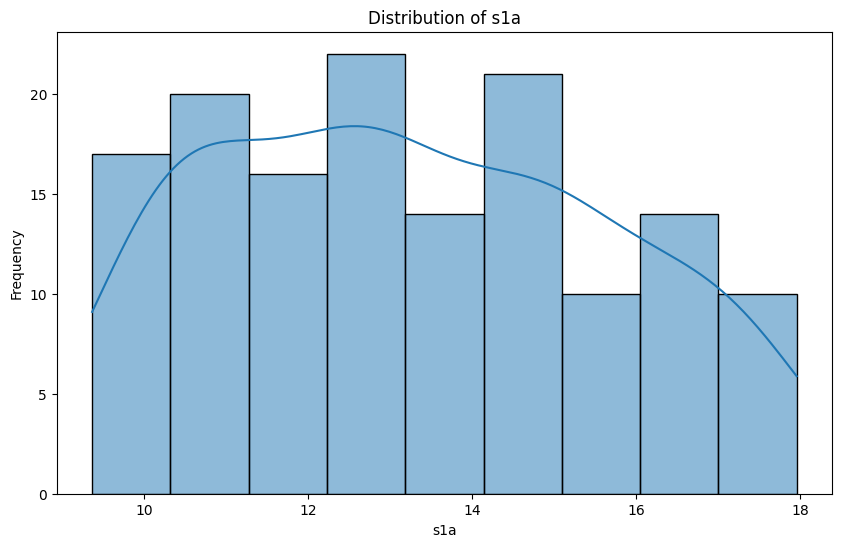


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean      15.830188
std        3.257209
min       10.319000
25%       13.256600
50%       15.620450
75%       18.638375
max       21.977600
Name: s1x, dtype: float64


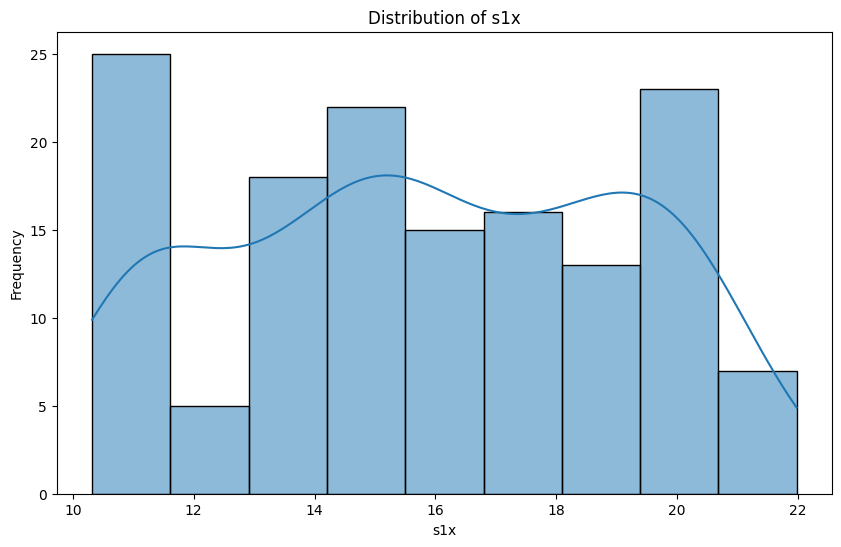


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean      10.187037
std        1.338730
min        7.427300
25%        9.378050
50%        9.974750
75%       11.122250
max       14.450000
Name: s1i, dtype: float64


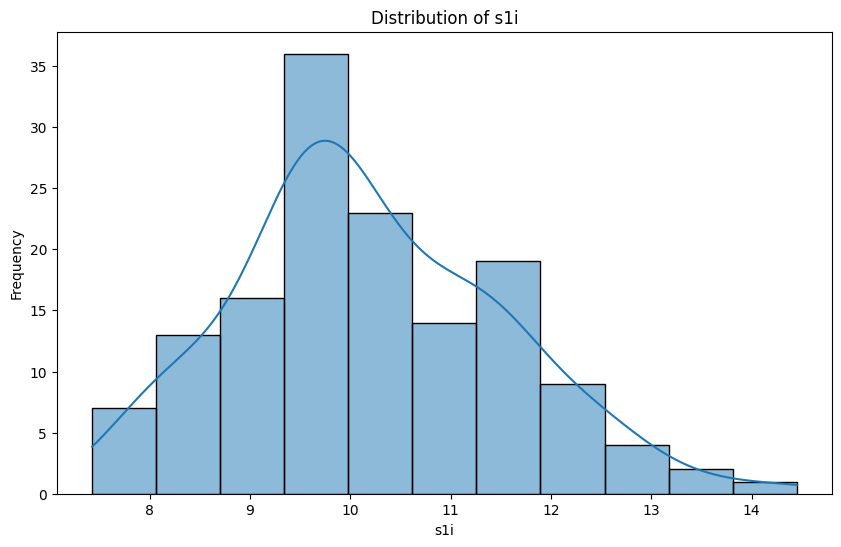


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       1.019936
std        0.448109
min        0.156060
25%        0.749317
50%        1.012095
75%        1.356345
max        2.203200
Name: s1s, dtype: float64


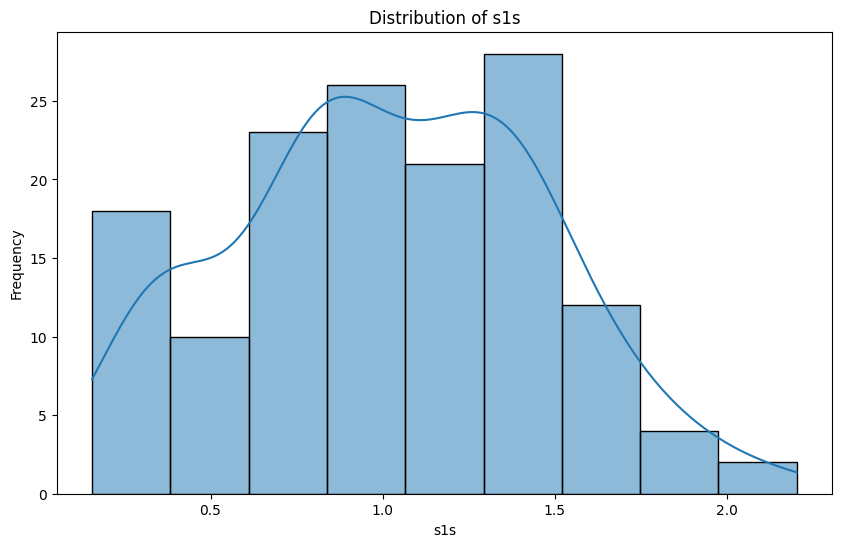


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean      13.171928
std        2.407834
min        9.230170
25%       11.061580
50%       12.913645
75%       14.912590
max       17.877730
Name: s2a, dtype: float64


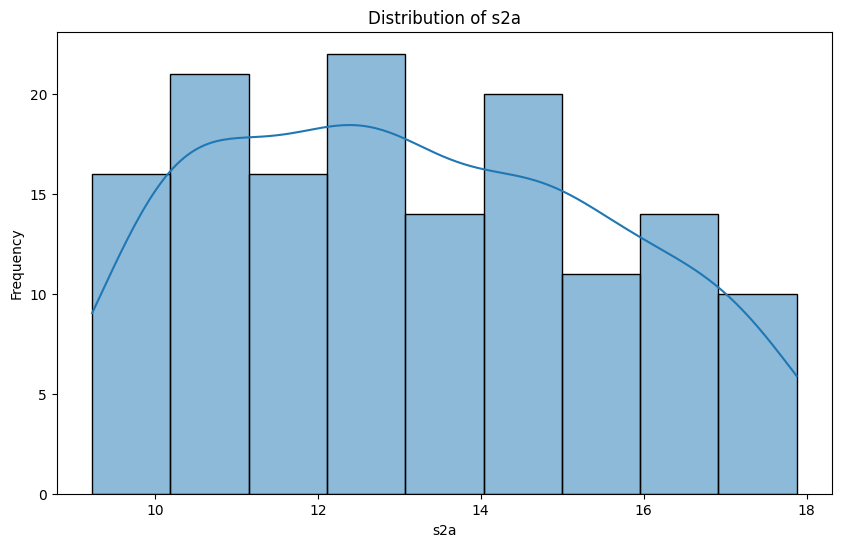


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean      15.725594
std        3.229616
min       10.088500
25%       13.244125
50%       15.481750
75%       18.580000
max       21.288100
Name: s2x, dtype: float64


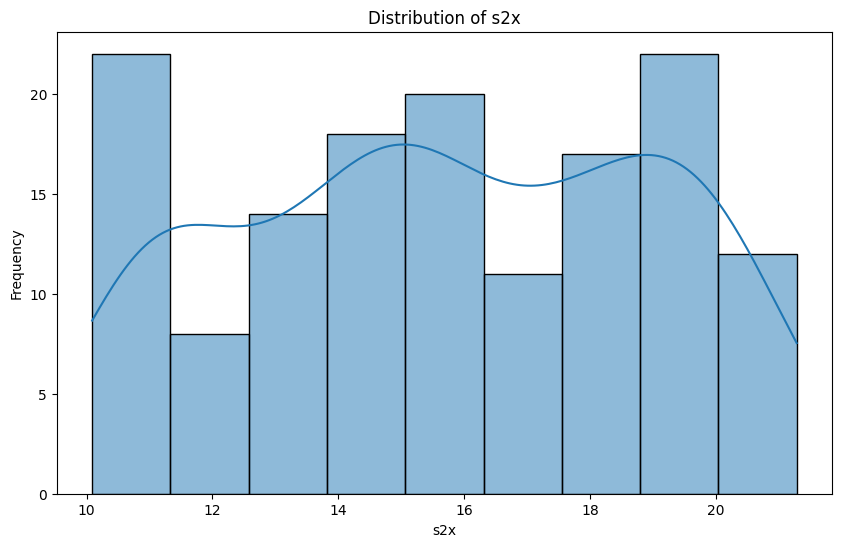


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean      10.069056
std        1.377648
min        7.472200
25%        9.204925
50%        9.881950
75%       11.017975
max       14.586700
Name: s2i, dtype: float64


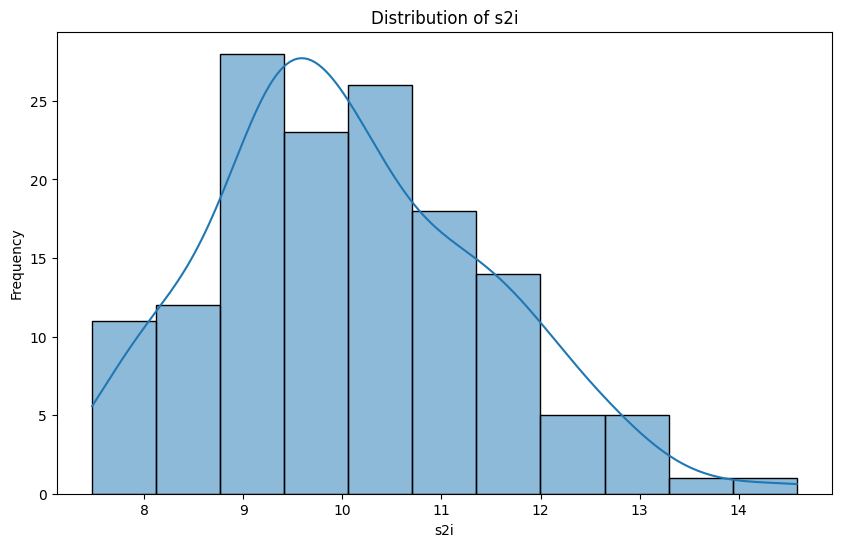


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       1.024303
std        0.447224
min        0.160650
25%        0.756202
50%        1.021275
75%        1.363230
max        2.189430
Name: s2s, dtype: float64


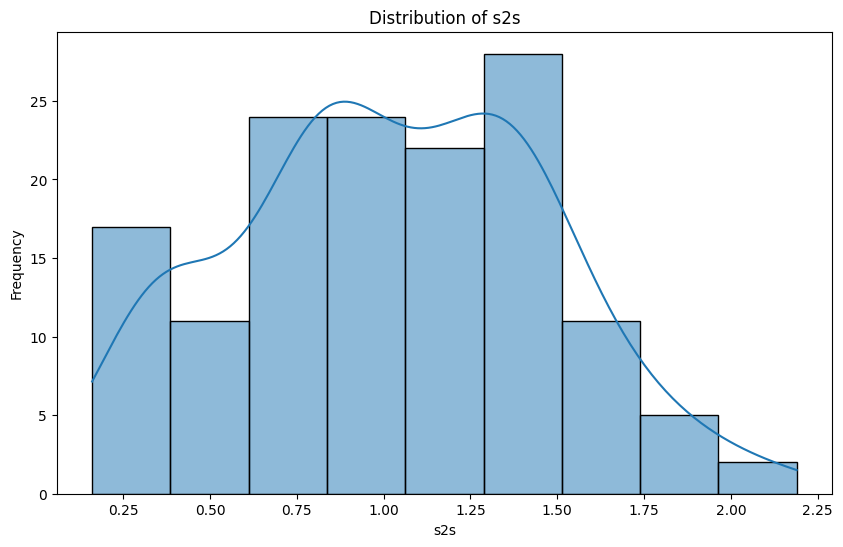


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean      12.411838
std        2.735871
min        8.002550
25%       10.251330
50%       11.869390
75%       14.527563
max       17.671950
Name: s3a, dtype: float64


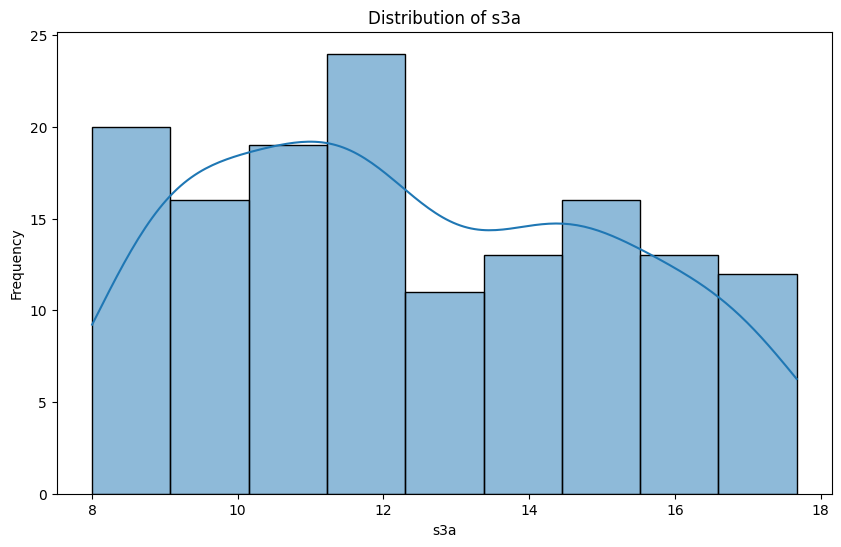


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean      15.133298
std        3.560024
min        9.075910
25%       12.447355
50%       14.694985
75%       18.169638
max       20.864500
Name: s3x, dtype: float64


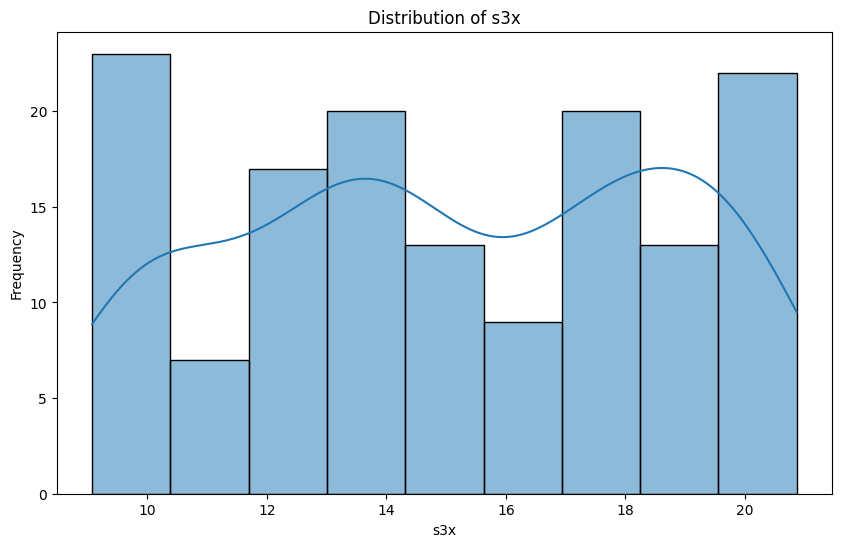


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       9.157775
std        1.528786
min        6.277840
25%        7.975030
50%        8.846560
75%       10.107985
max       13.662910
Name: s3i, dtype: float64


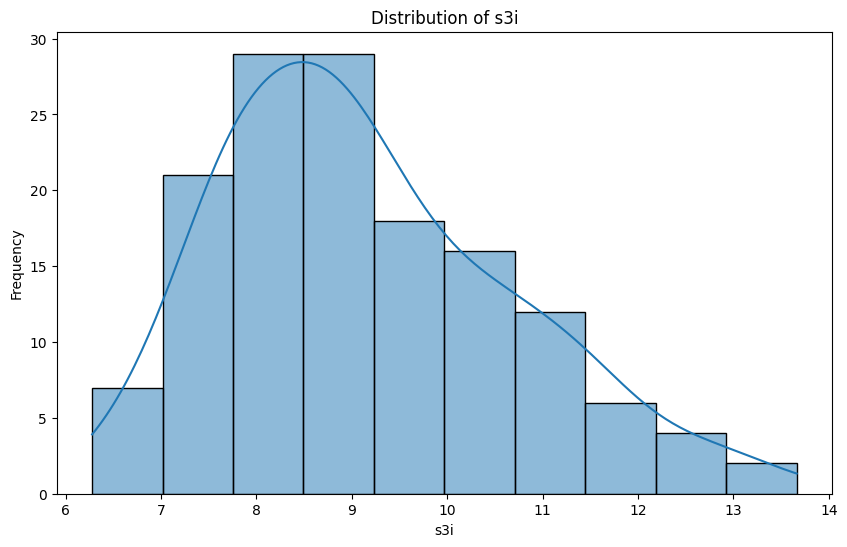


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       1.094605
std        0.474265
min        0.302740
25%        0.774055
50%        1.059595
75%        1.458668
max        2.311850
Name: s3s, dtype: float64


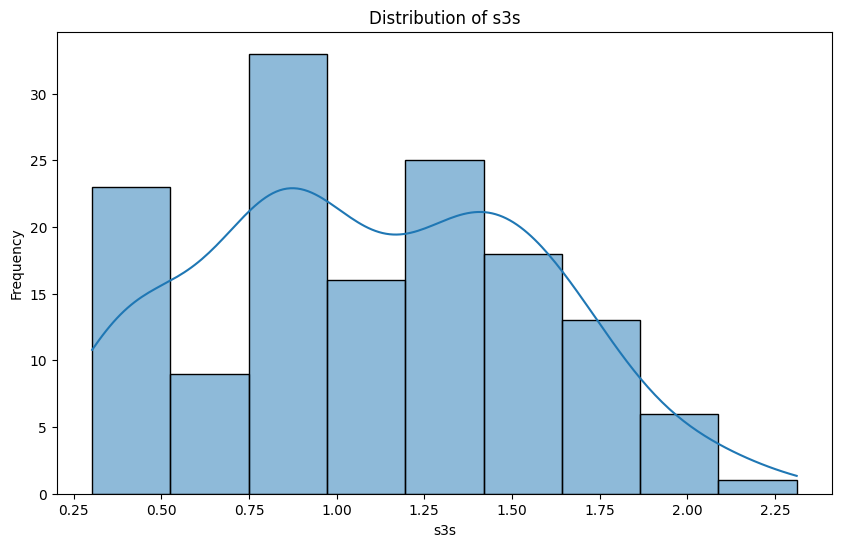


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean      13.708333
std        7.222609
min        3.000000
25%        9.000000
50%       11.500000
75%       17.250000
max       35.000000
Name: d1a, dtype: float64


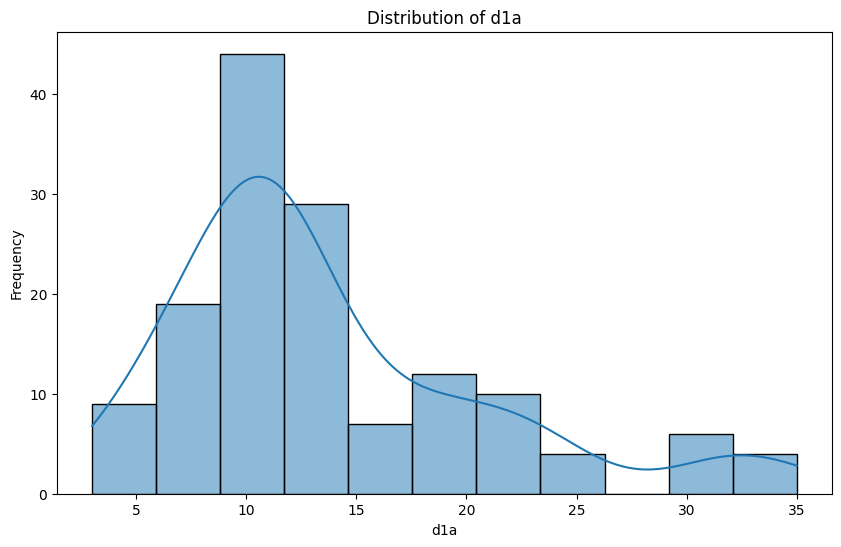


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       4.069444
std        1.402559
min        2.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        9.000000
Name: d1s, dtype: float64


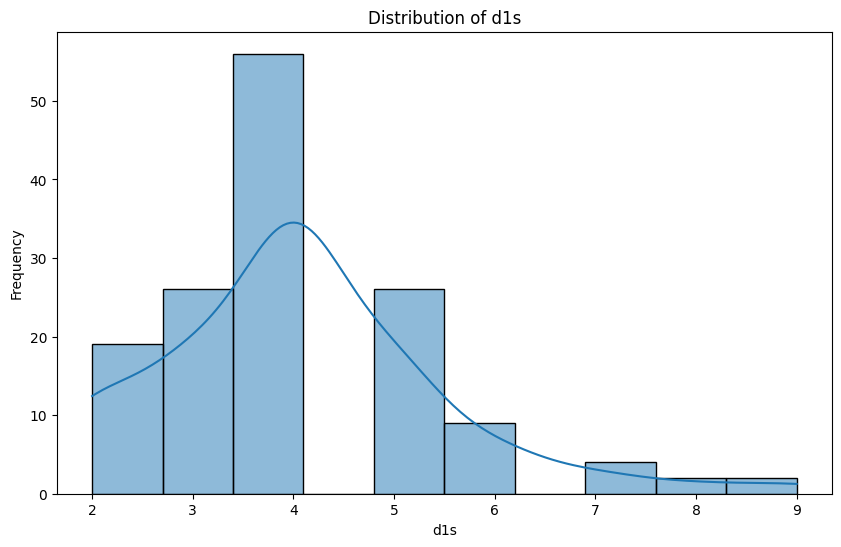


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean      13.631944
std        4.740462
min        3.000000
25%       10.750000
50%       14.000000
75%       16.000000
max       25.000000
Name: d2a, dtype: float64


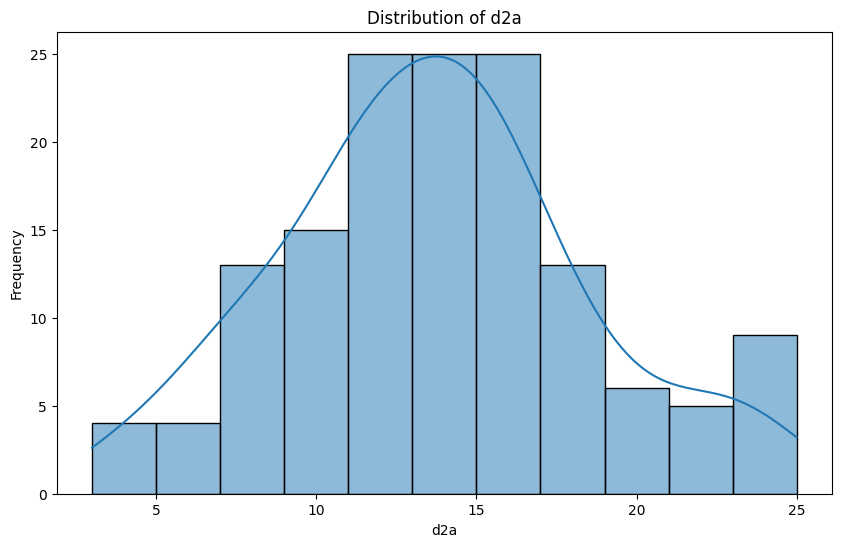


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       5.493056
std        1.481808
min        3.000000
25%        5.000000
50%        5.000000
75%        6.000000
max       11.000000
Name: d2s, dtype: float64


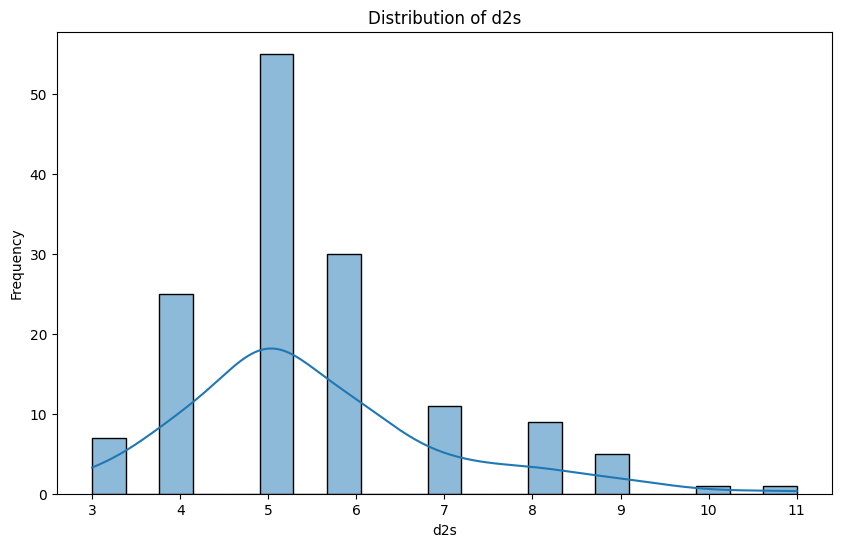


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      81.604167
std        7.273112
min       64.000000
25%       74.000000
50%       84.000000
75%       87.000000
max       92.000000
Name: h1a, dtype: float64


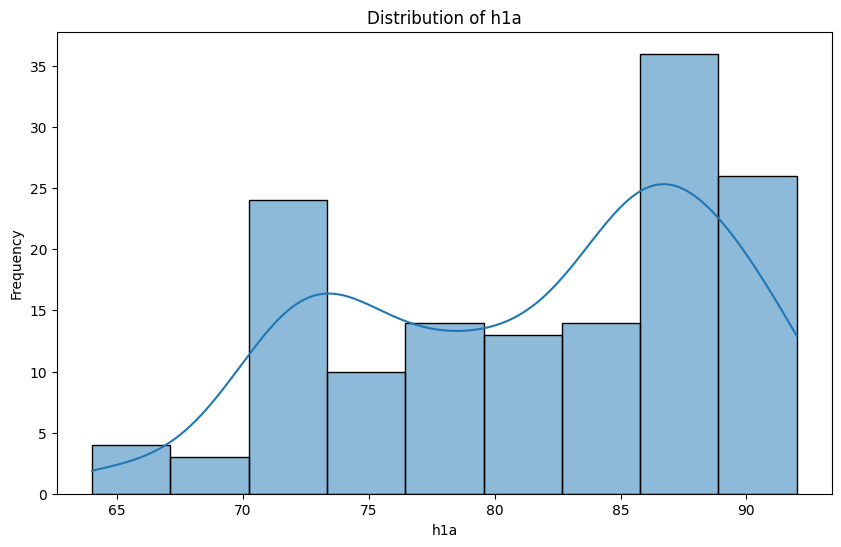


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      82.395833
std        6.756731
min       65.000000
25%       75.750000
50%       84.000000
75%       88.000000
max       92.000000
Name: h1x, dtype: float64


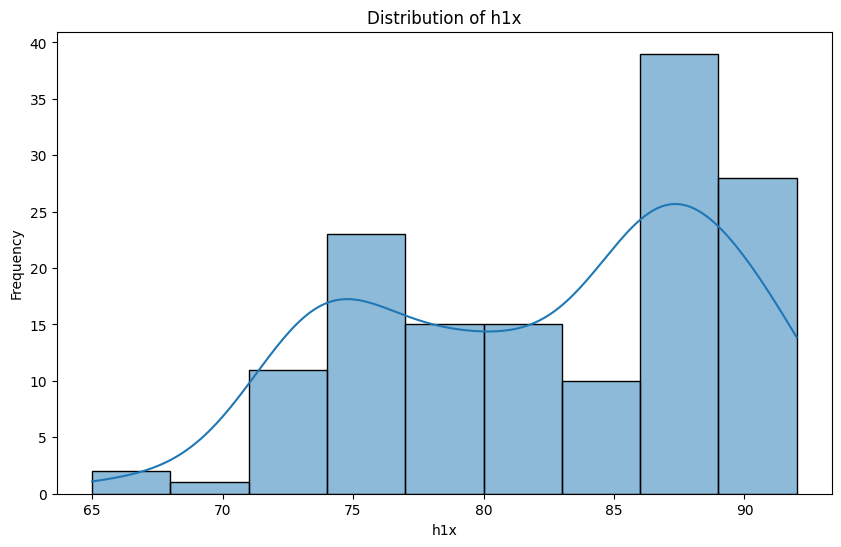


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      80.868056
std        7.760620
min       60.000000
25%       73.000000
50%       83.000000
75%       87.000000
max       92.000000
Name: h1i, dtype: float64


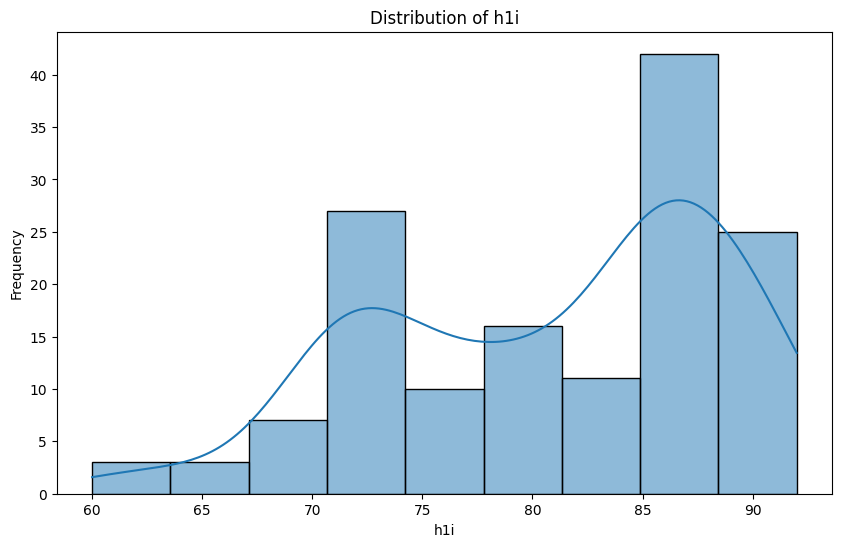


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       5.093750
std        1.502479
min        2.450000
25%        4.250000
50%        5.250000
75%        6.275000
max        7.750000
Name: t1a, dtype: float64


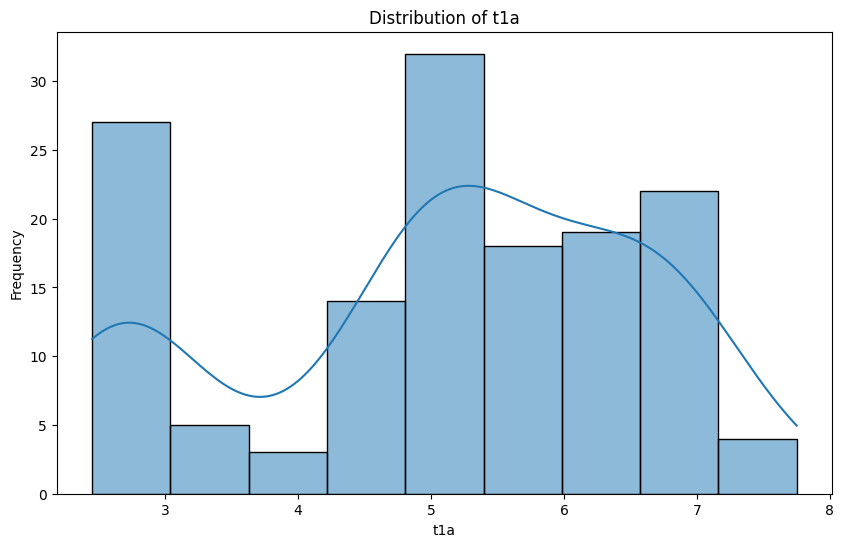


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       5.189583
std        1.554161
min        2.450000
25%        4.325000
50%        5.250000
75%        6.475000
max        8.350000
Name: t1x, dtype: float64


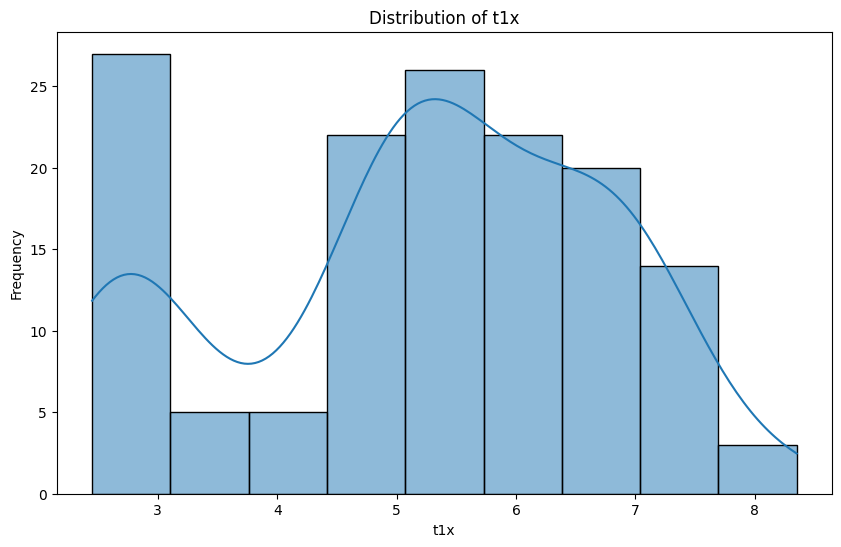


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       5.004861
std        1.467543
min        2.450000
25%        4.225000
50%        5.150000
75%        6.175000
max        7.650000
Name: t1i, dtype: float64


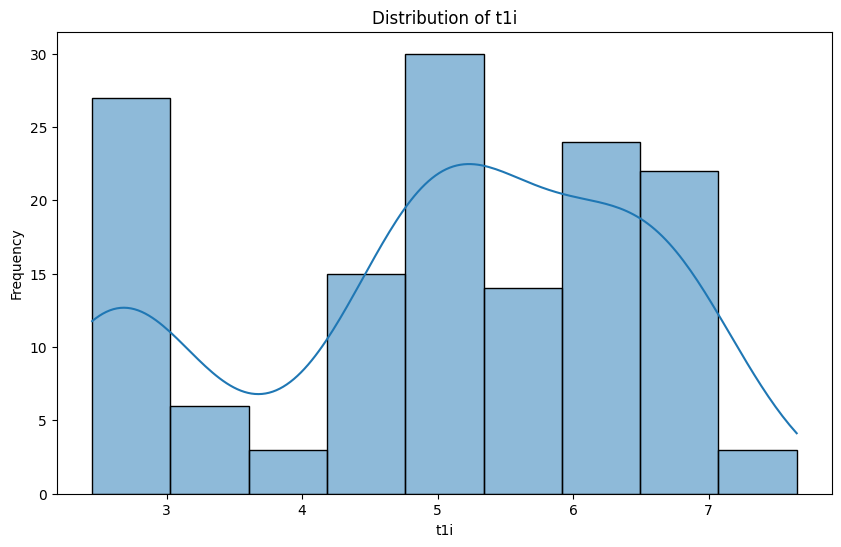


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1015.243056
std         3.391158
min      1010.000000
25%      1012.000000
50%      1015.000000
75%      1018.000000
max      1021.000000
Name: b1a, dtype: float64


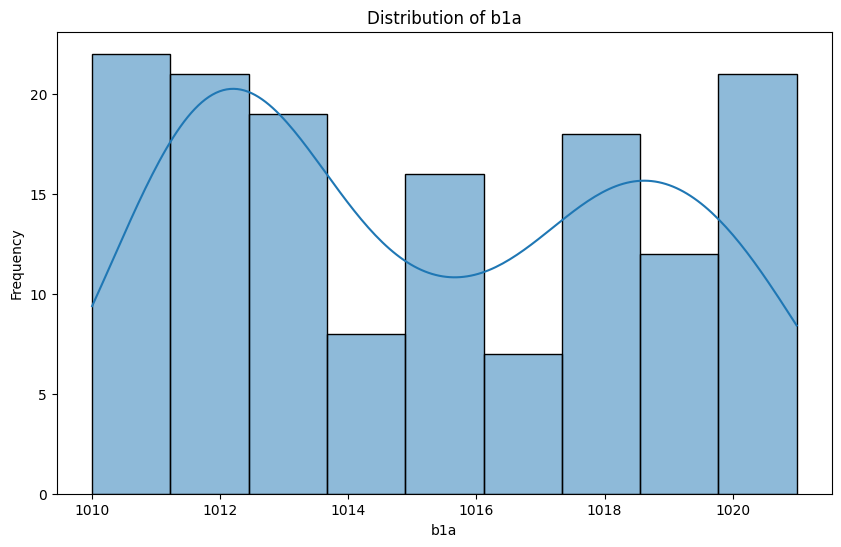


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1015.687500
std         3.450892
min      1011.000000
25%      1013.000000
50%      1015.000000
75%      1019.000000
max      1022.000000
Name: b1x, dtype: float64


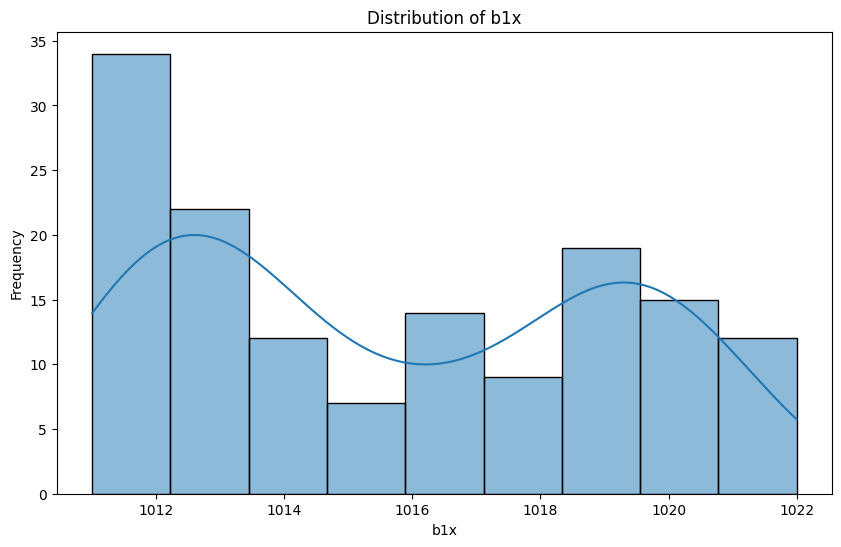


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1014.770833
std         3.383875
min      1010.000000
25%      1012.000000
50%      1014.000000
75%      1018.000000
max      1021.000000
Name: b1i, dtype: float64


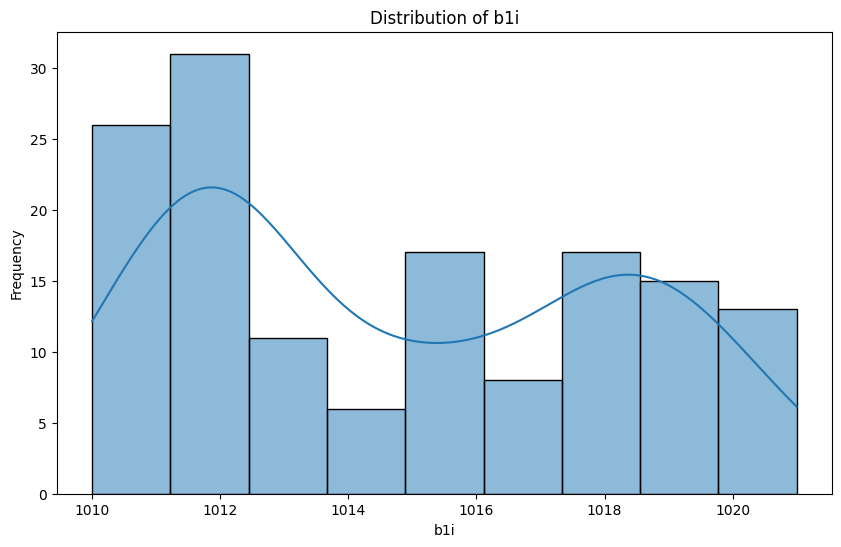


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean      11.183606
std        3.215281
min        6.390240
25%        8.541755
50%       10.532790
75%       14.044897
max       17.366730
Name: p1a, dtype: float64


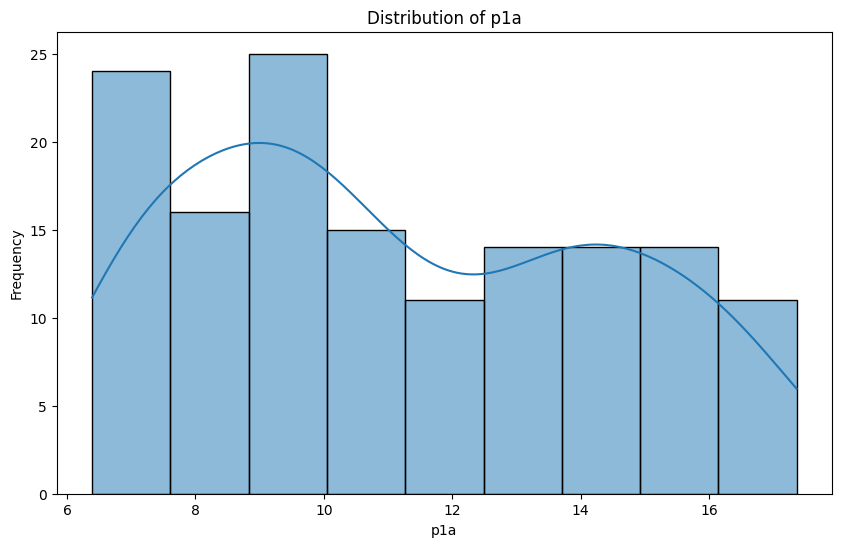


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean      14.253642
std        4.148608
min        7.472300
25%       11.220538
50%       13.616200
75%       18.017800
max       21.639950
Name: p1x, dtype: float64


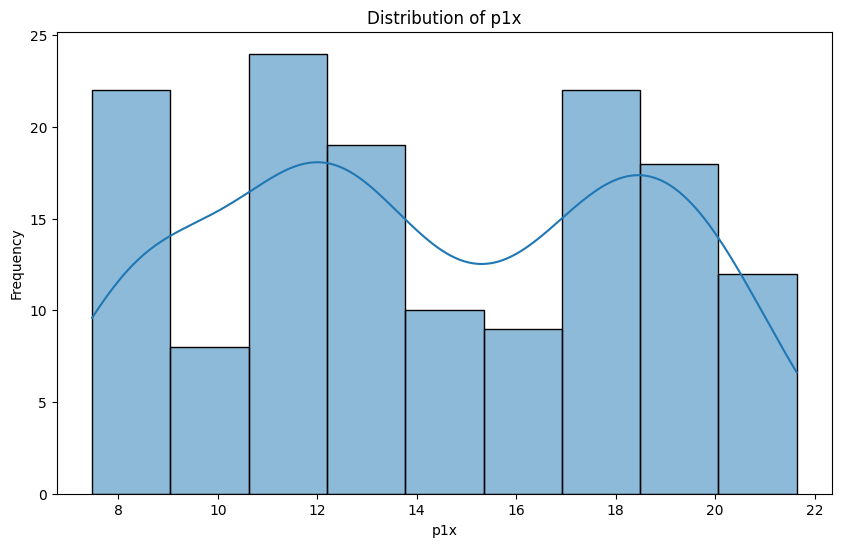


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       7.812036
std        1.951968
min        4.904700
25%        6.280200
50%        7.288900
75%        9.122900
max       12.836750
Name: p1i, dtype: float64


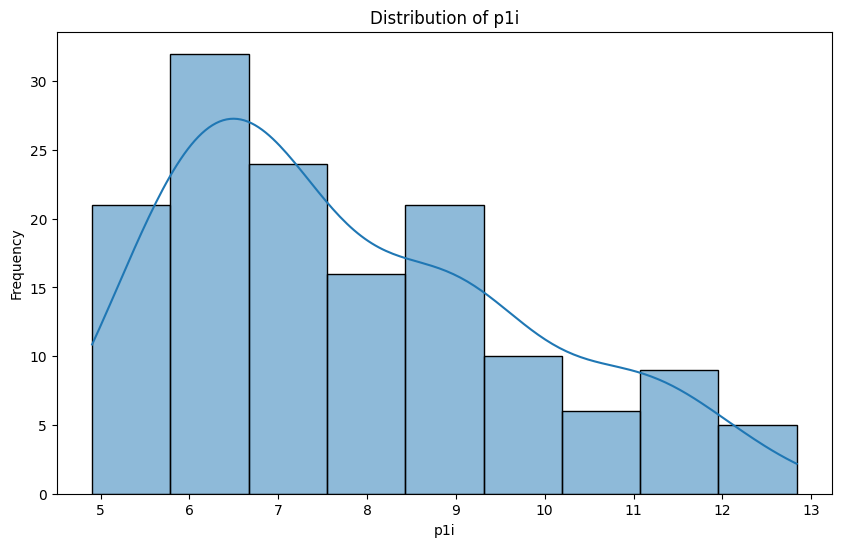


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       1.196847
std        0.510600
min        0.311780
25%        0.823008
50%        1.148545
75%        1.591000
max        2.338350
Name: p1s, dtype: float64


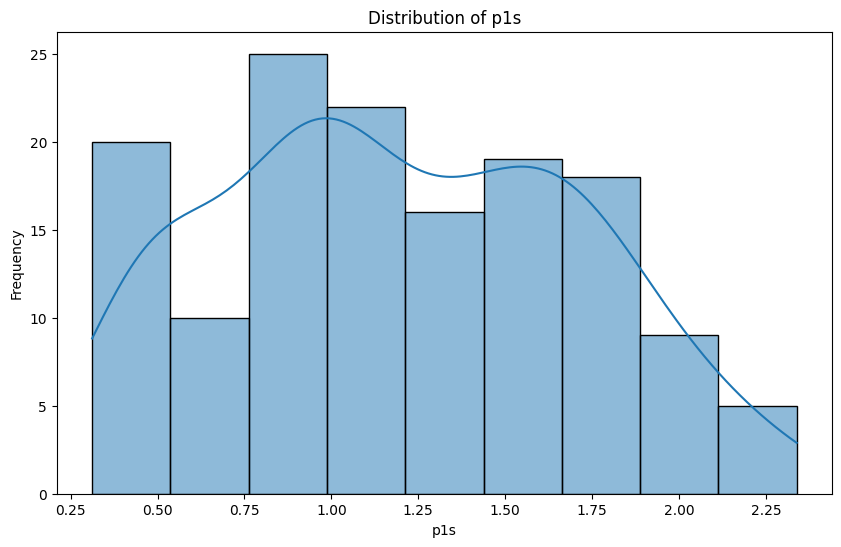


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      45.416667
std        3.013954
min       40.000000
25%       44.000000
50%       45.500000
75%       48.000000
max       50.000000
Name: tia, dtype: float64


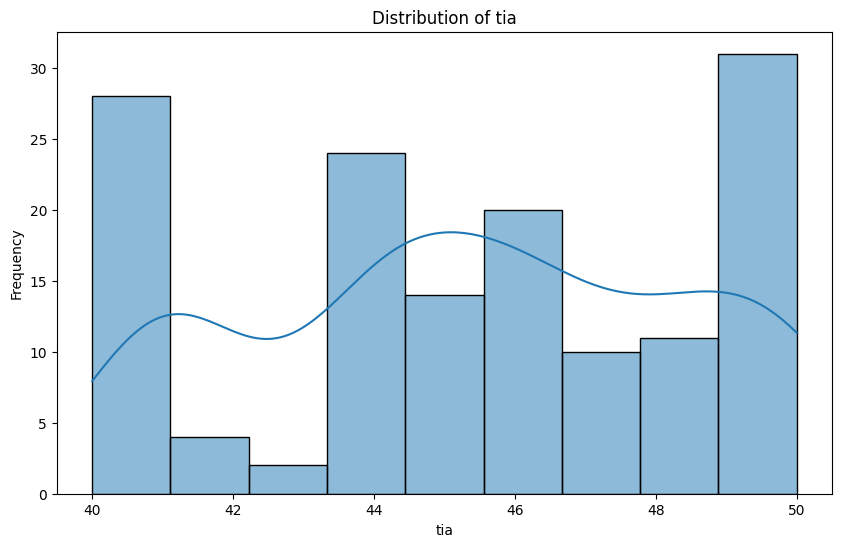


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      45.500000
std        3.003494
min       41.000000
25%       44.000000
50%       46.000000
75%       48.000000
max       50.000000
Name: tix, dtype: float64


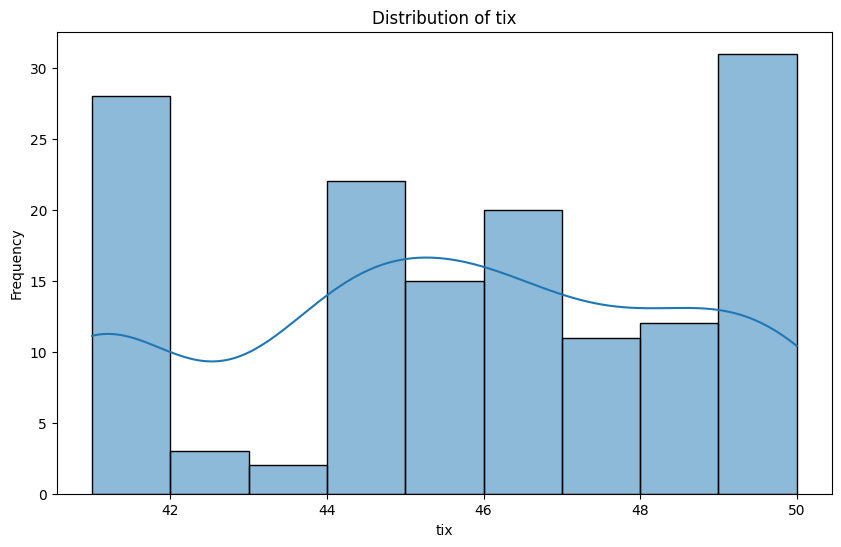


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      45.381944
std        2.994159
min       40.000000
25%       44.000000
50%       45.500000
75%       48.000000
max       50.000000
Name: tii, dtype: float64


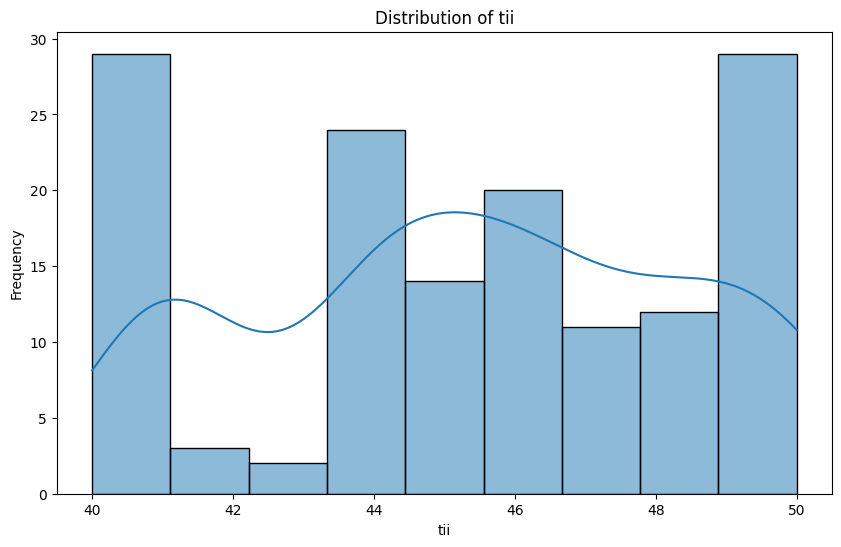


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.326389
std        5.212720
min      125.000000
25%      126.000000
50%      127.000000
75%      137.000000
max      138.000000
Name: vxa, dtype: float64


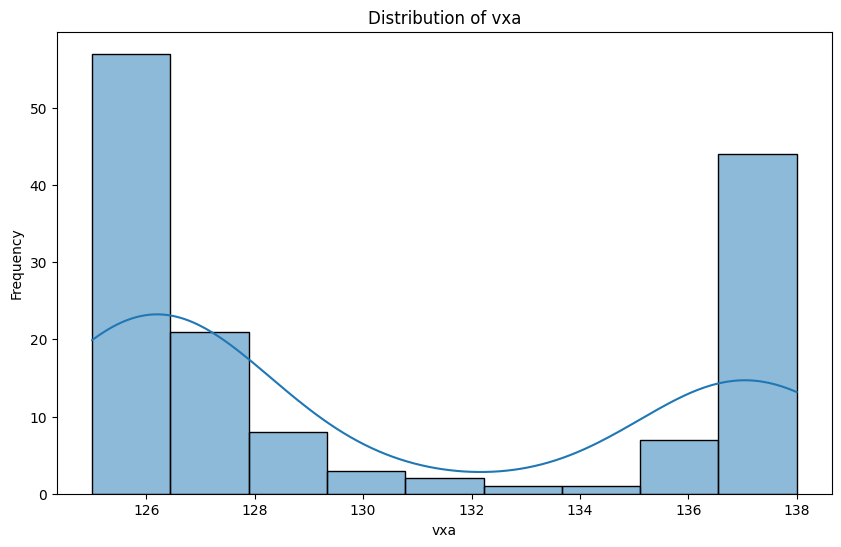


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     130.631944
std        5.404927
min      125.000000
25%      126.000000
50%      127.000000
75%      137.000000
max      139.000000
Name: vxx, dtype: float64


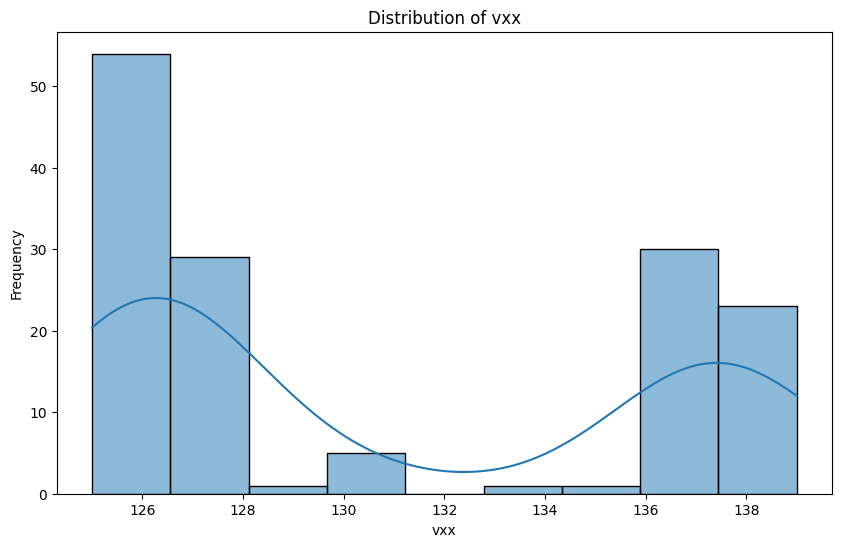


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     130.048611
std        5.114534
min      125.000000
25%      126.000000
50%      127.000000
75%      136.000000
max      138.000000
Name: vxi, dtype: float64


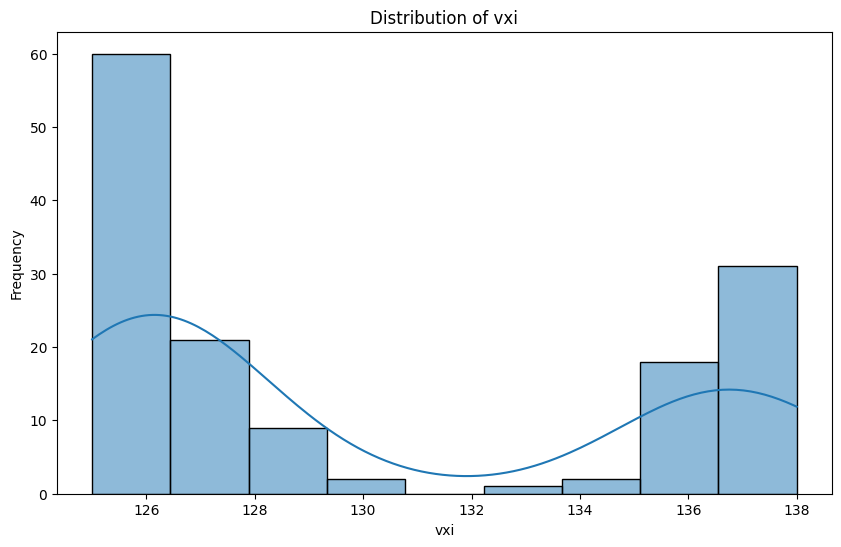


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


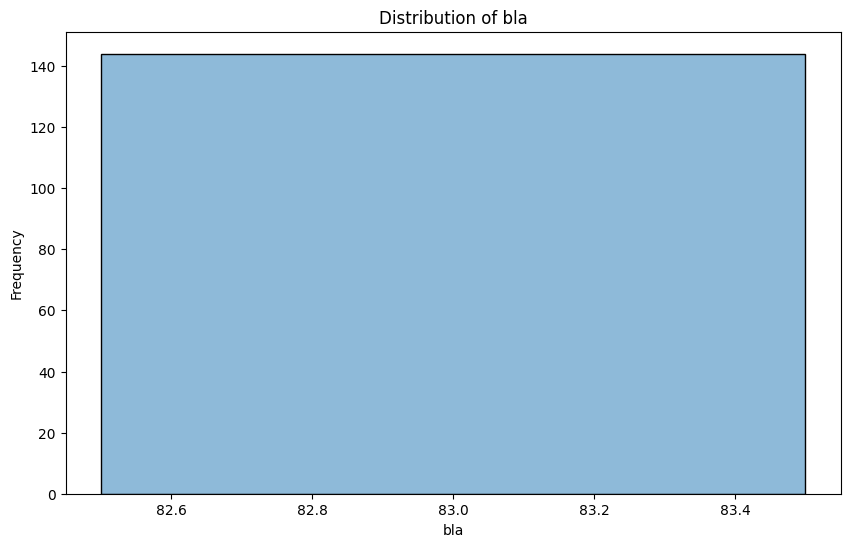


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


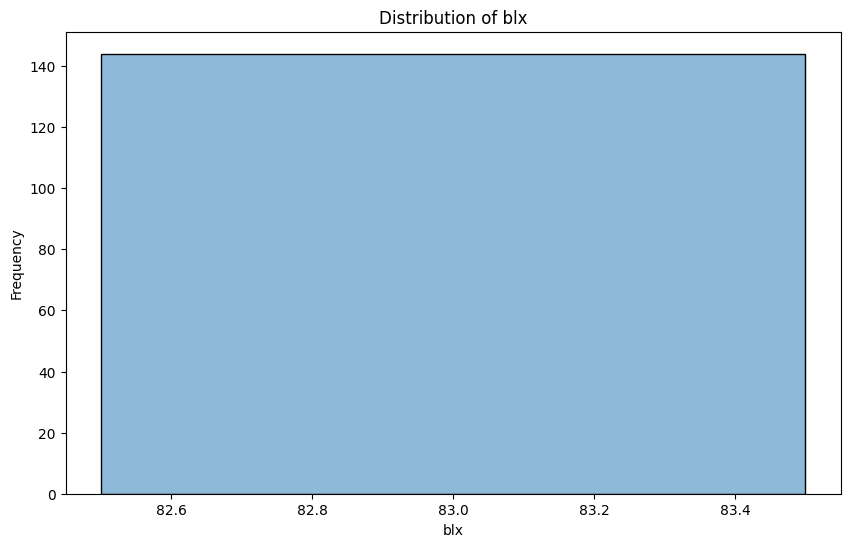


Analysis for column: bli
Descriptive Statistics:
count    144.000000
mean      82.951389
std        0.215804
min       82.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       83.000000
Name: bli, dtype: float64


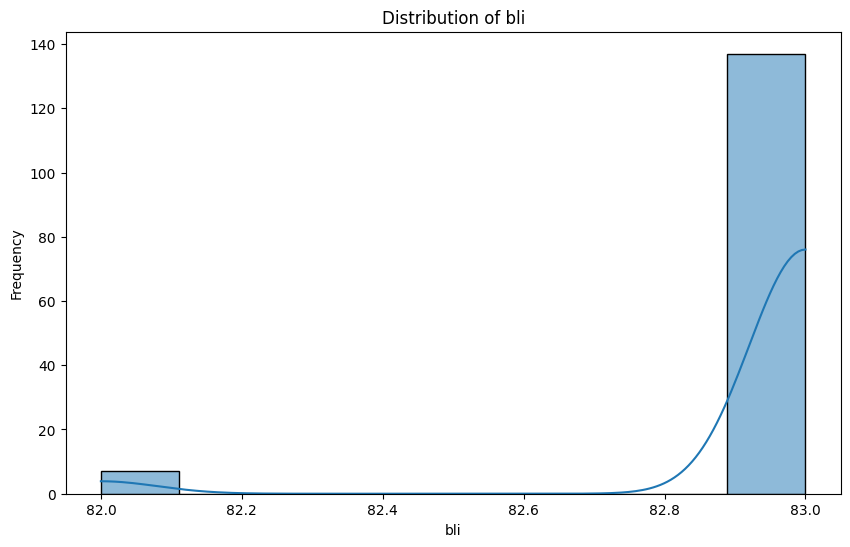


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


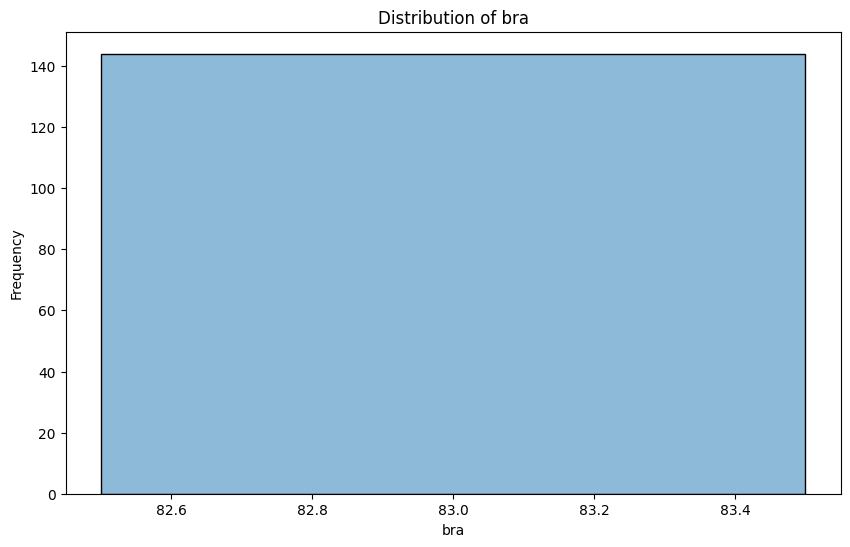


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


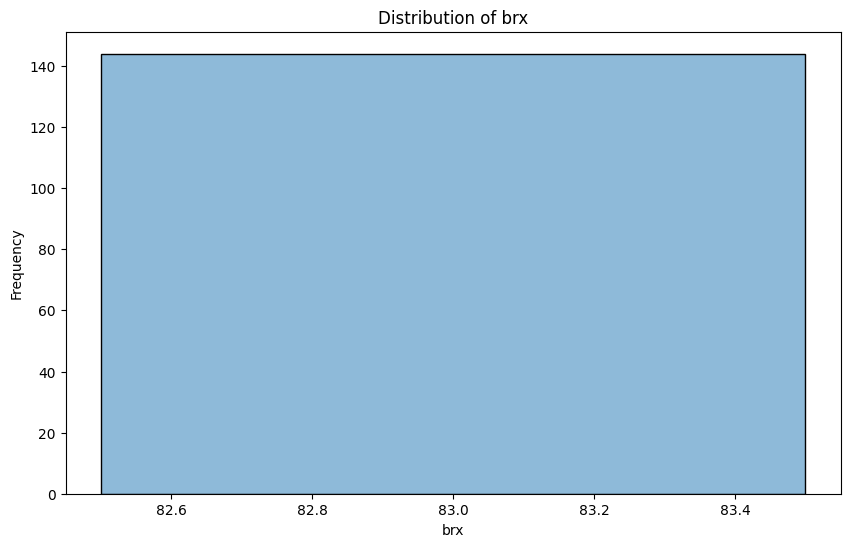


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


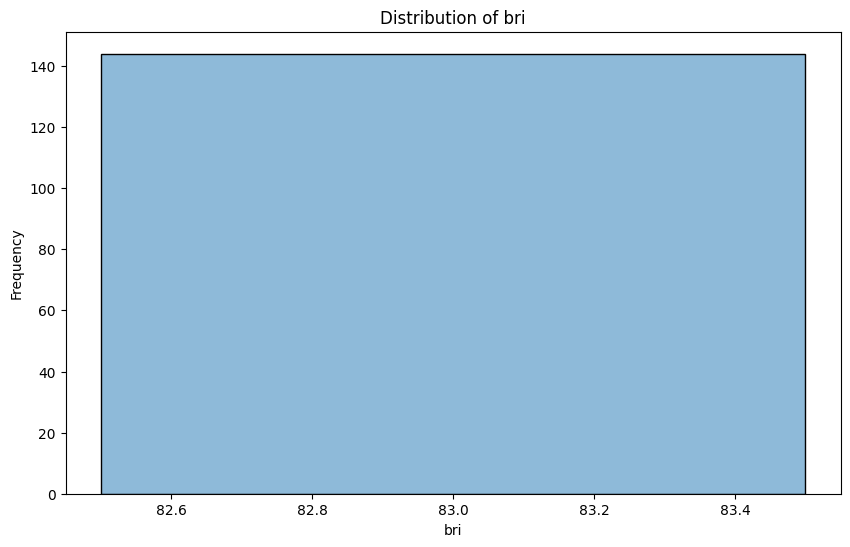

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

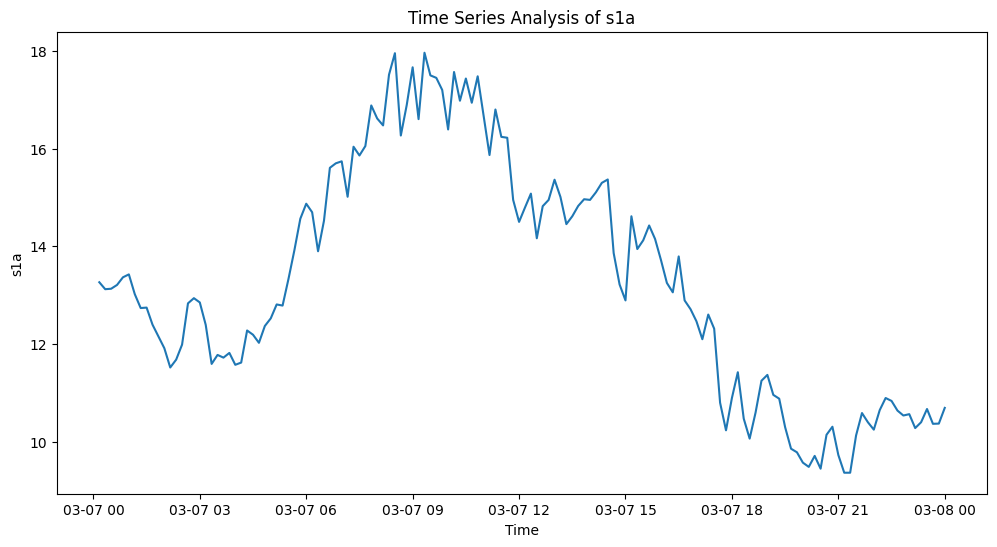

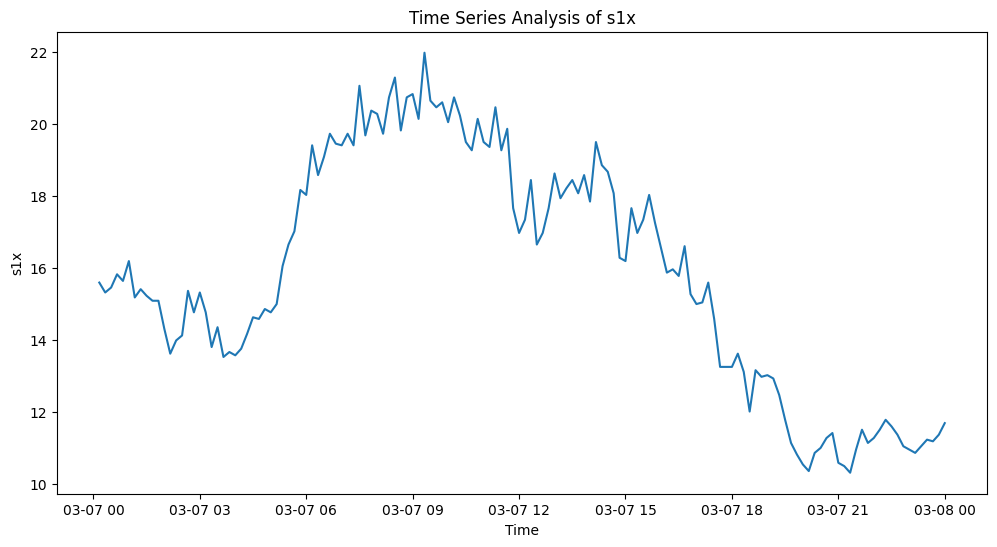

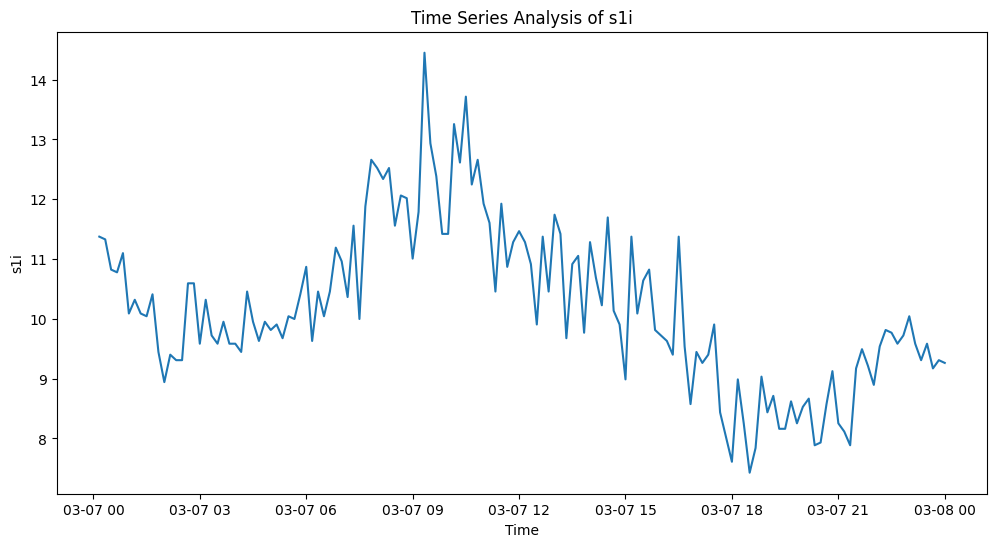

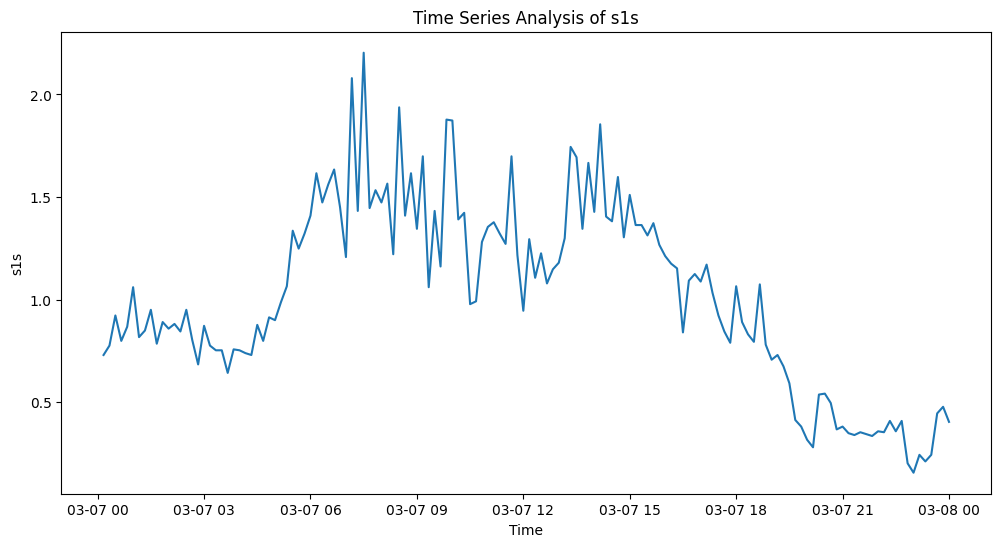

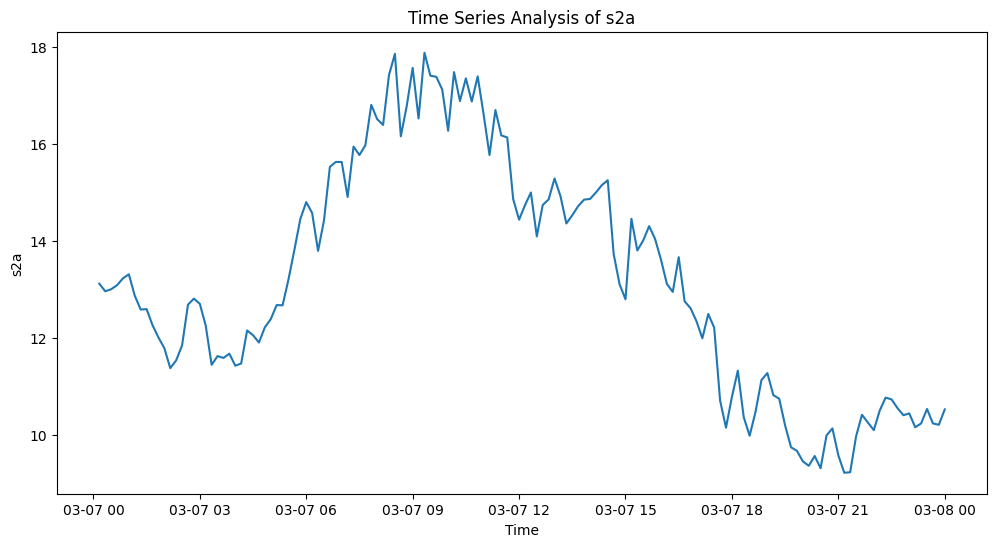

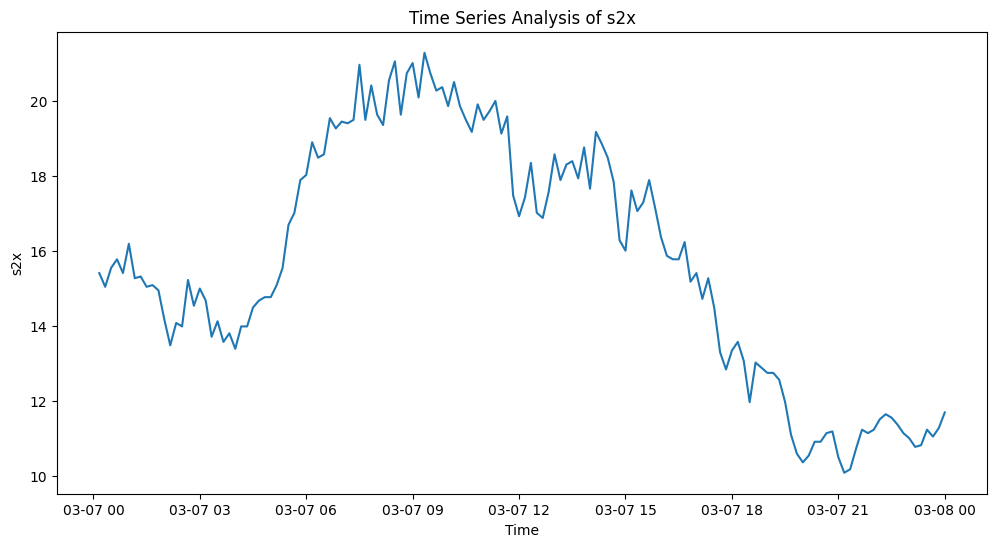

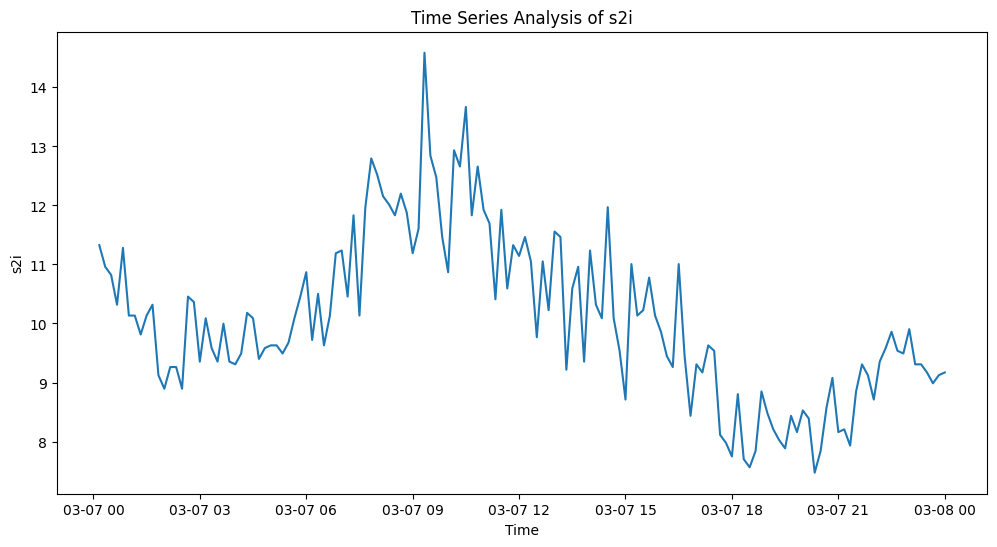

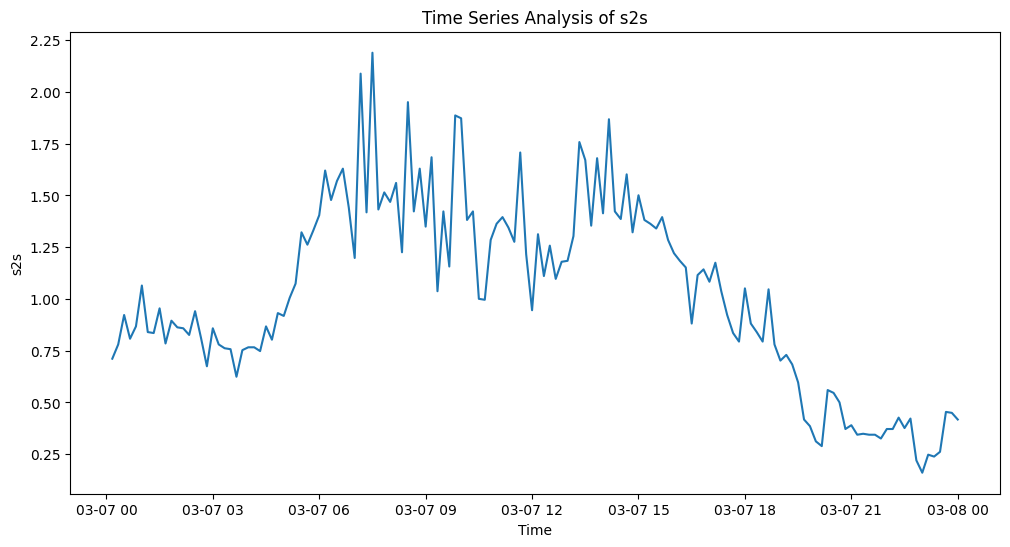

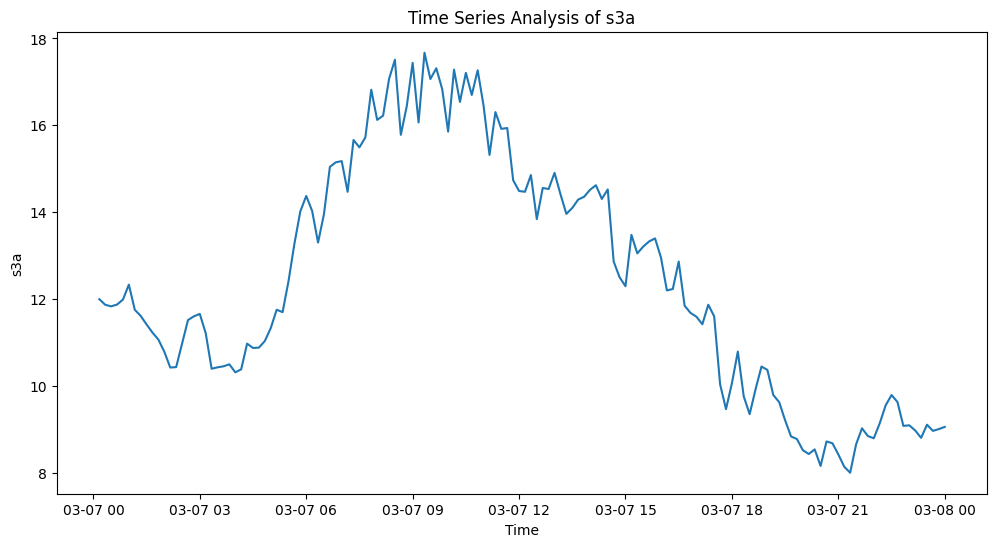

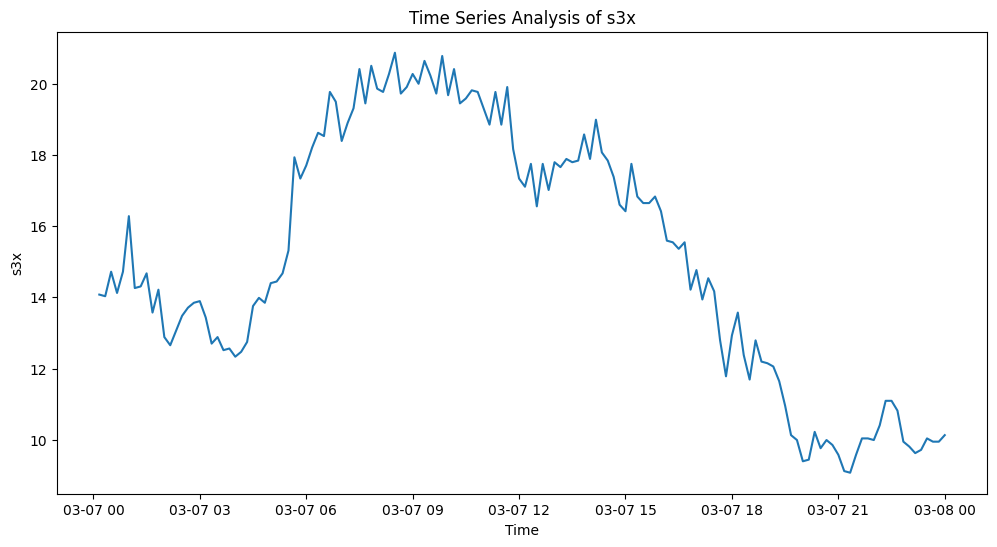

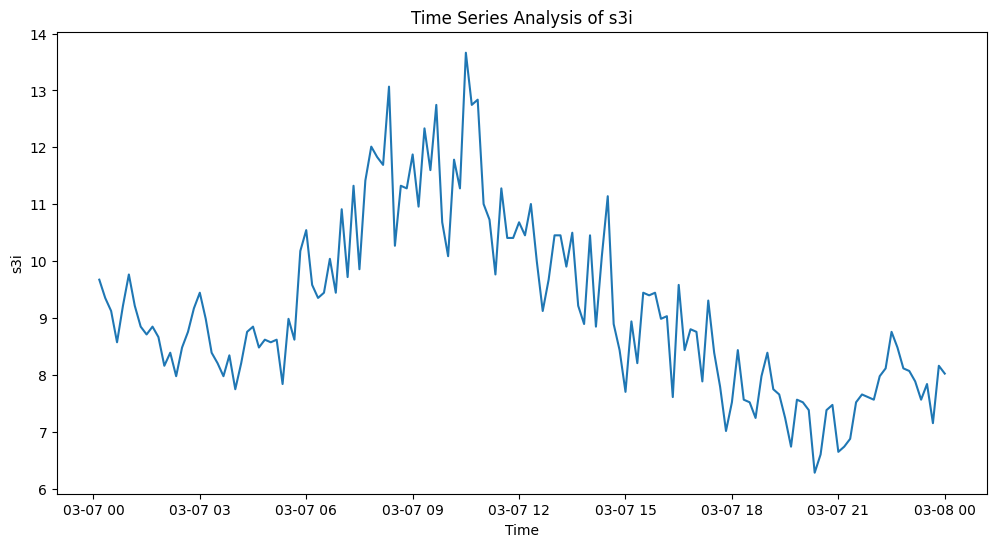

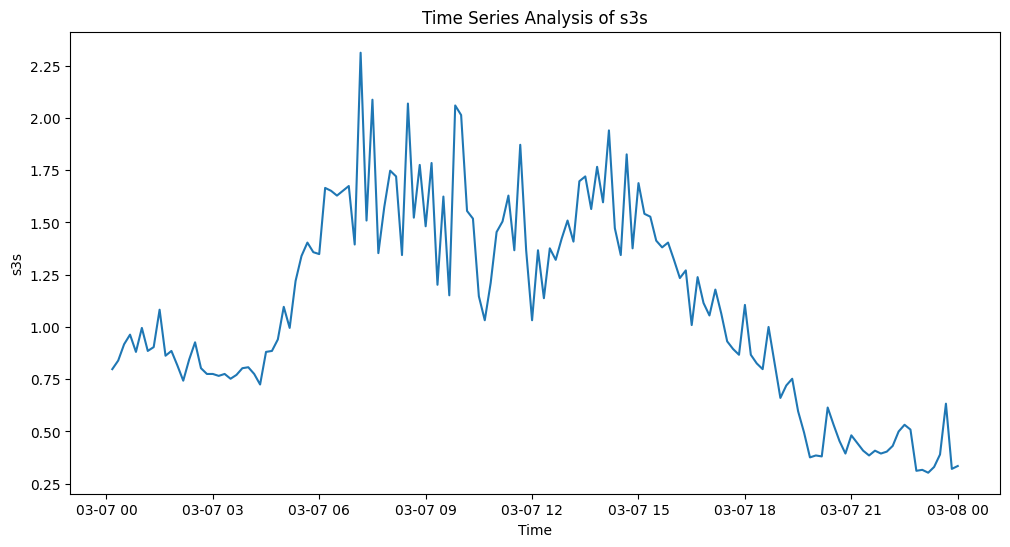

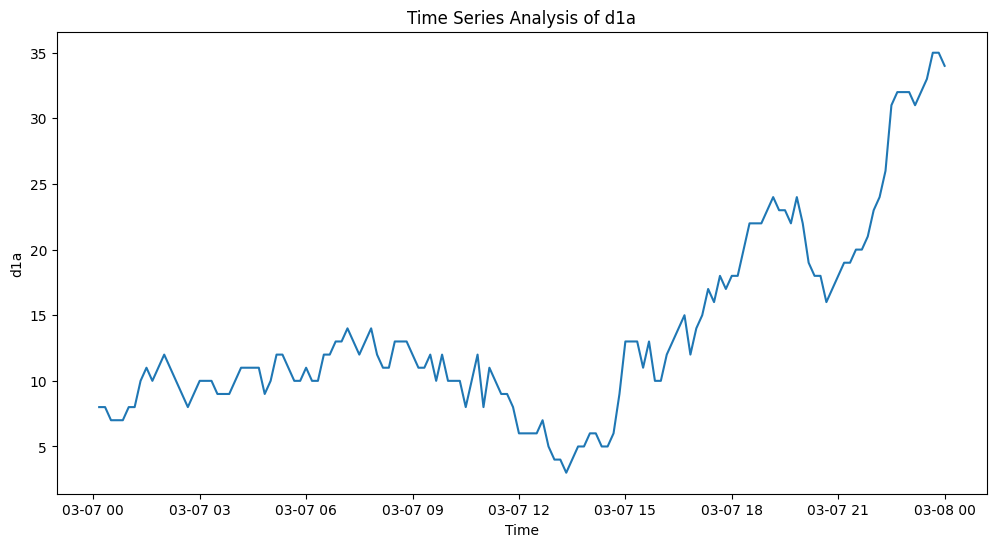

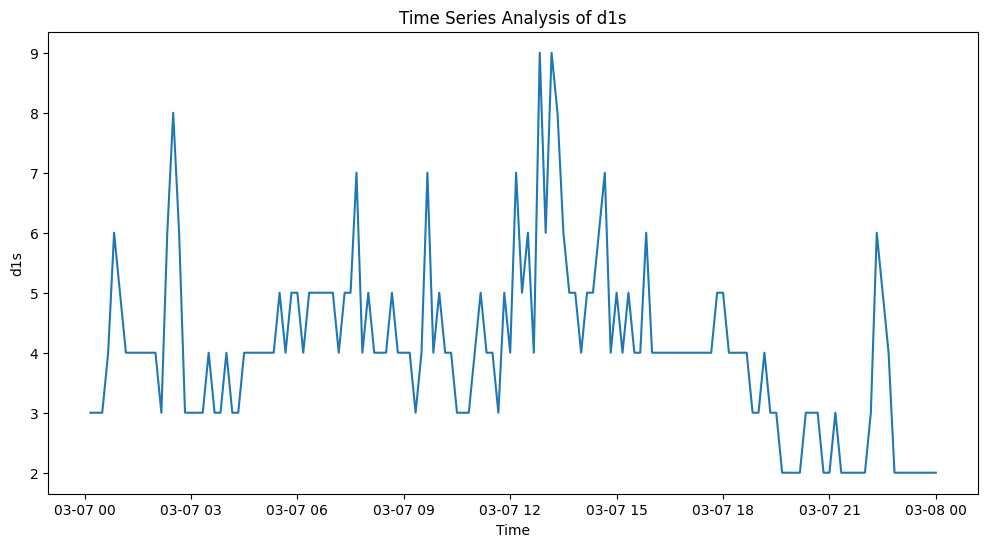

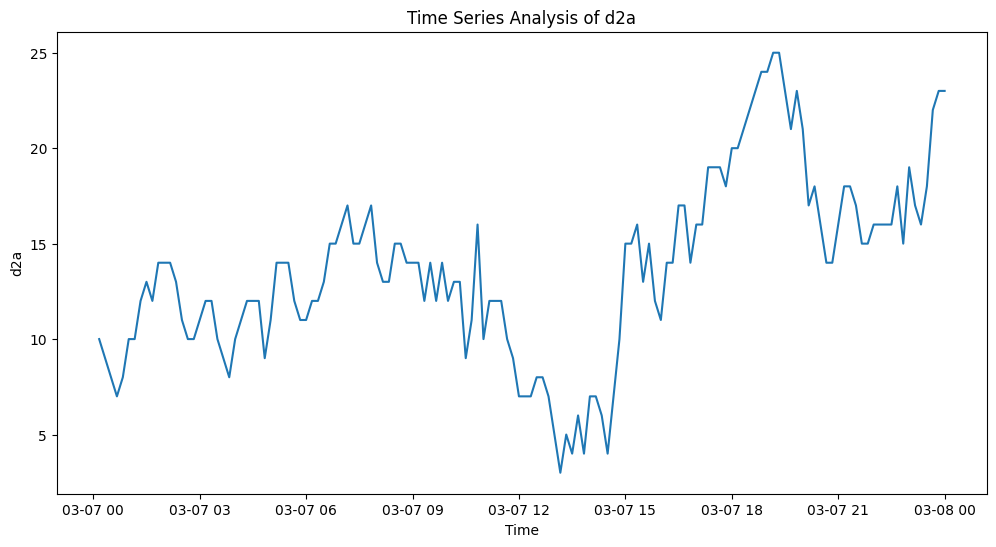

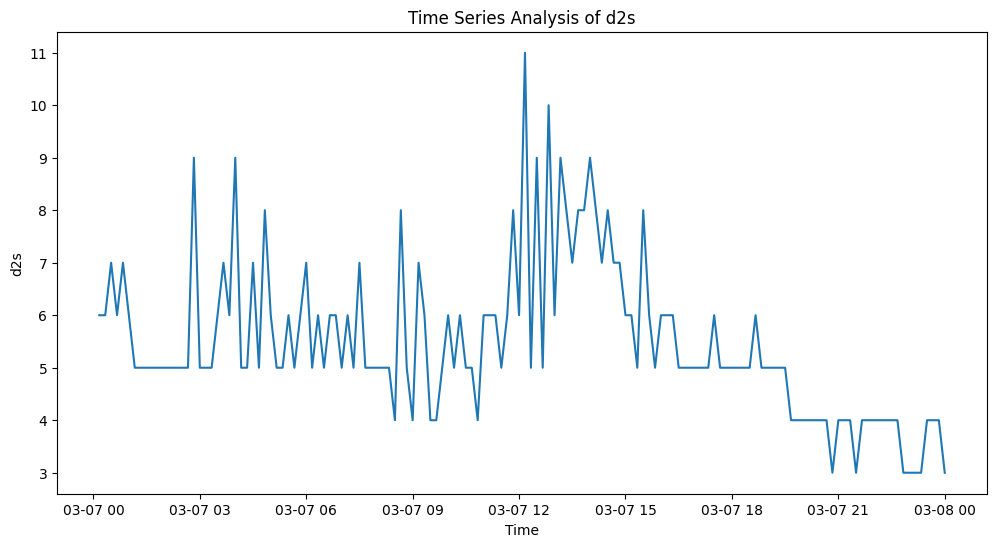

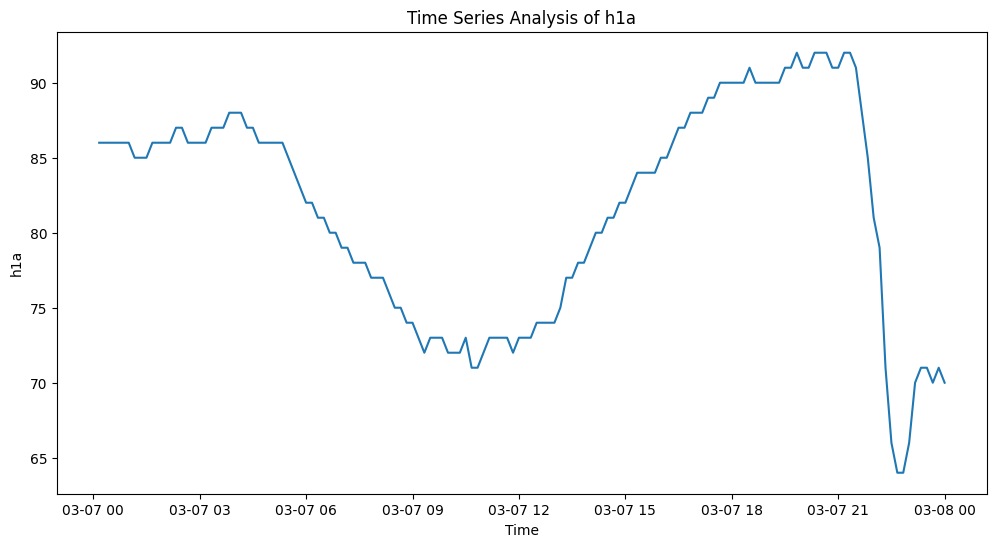

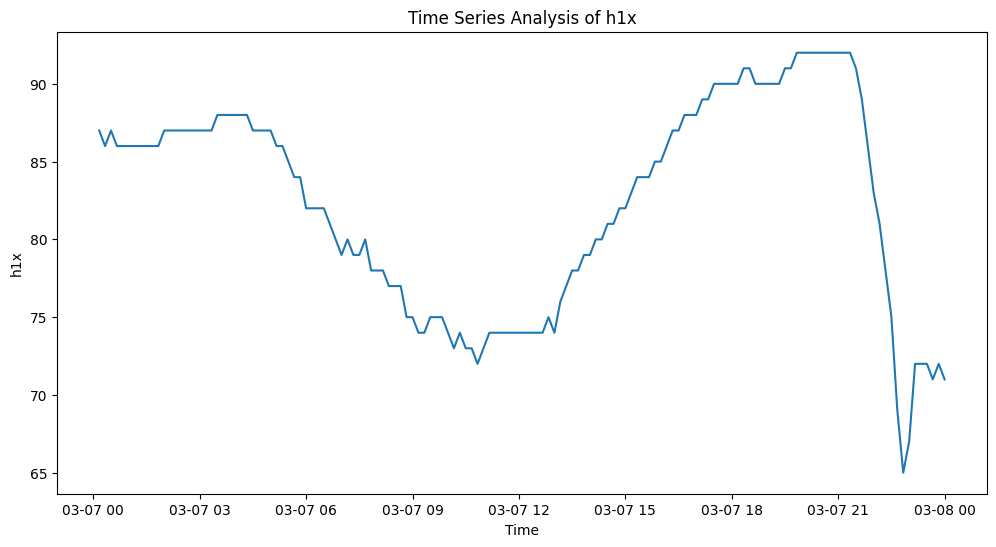

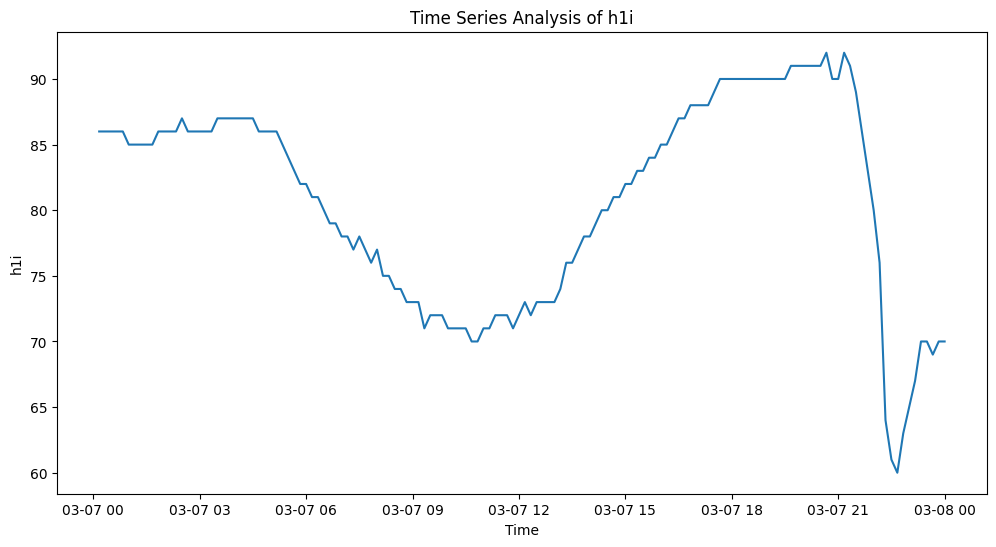

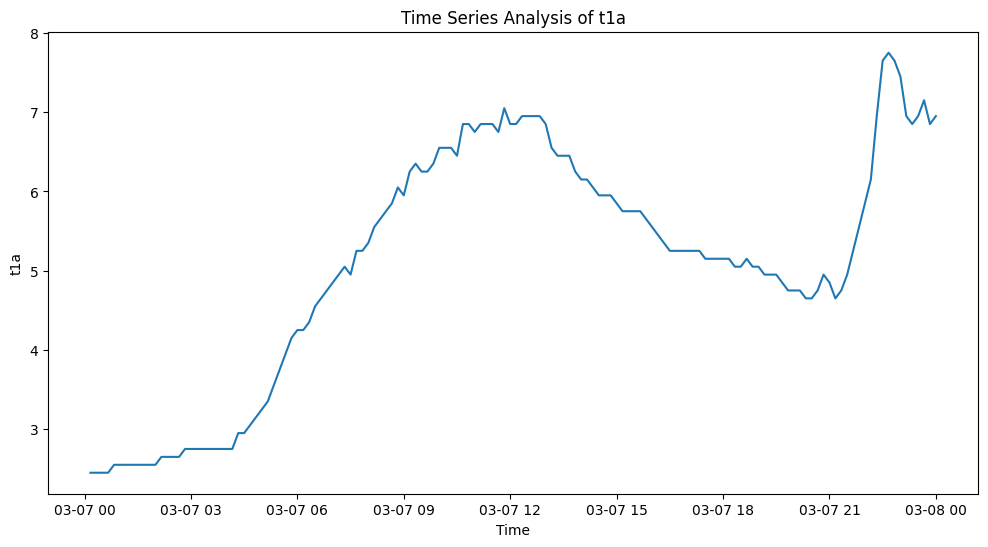

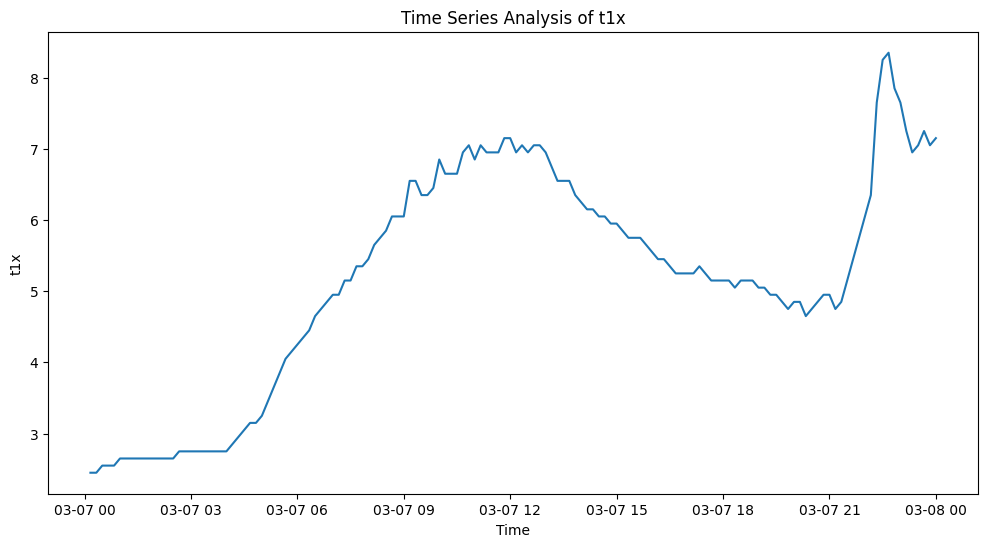

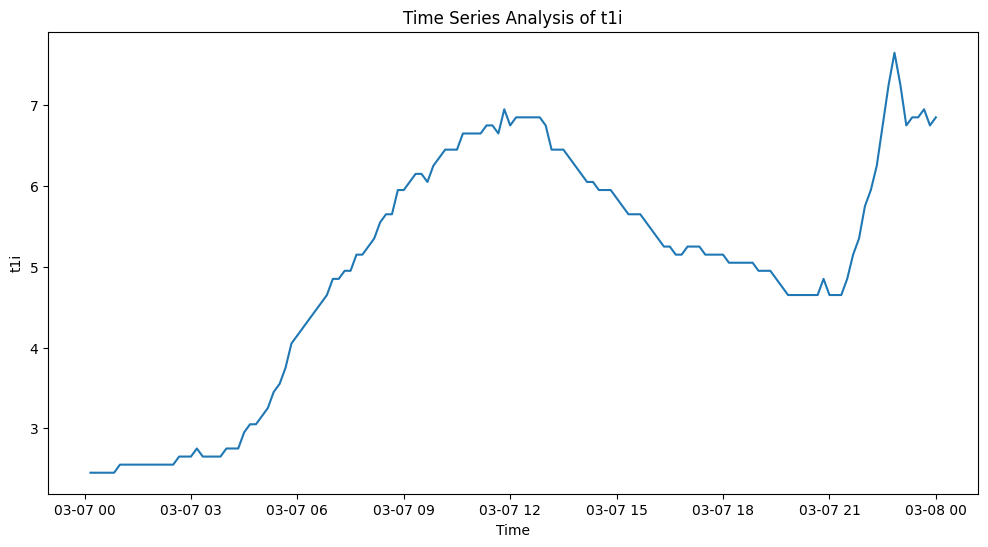

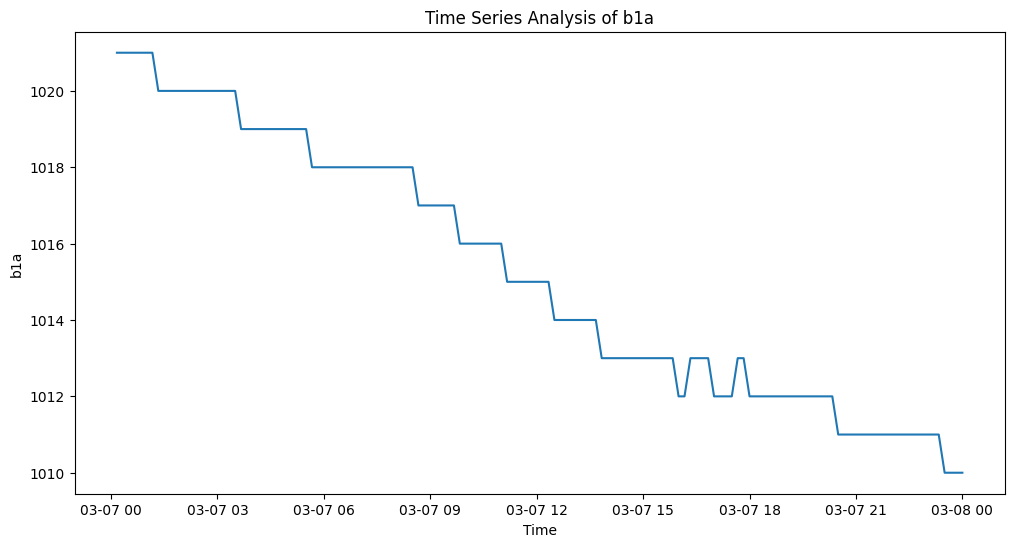

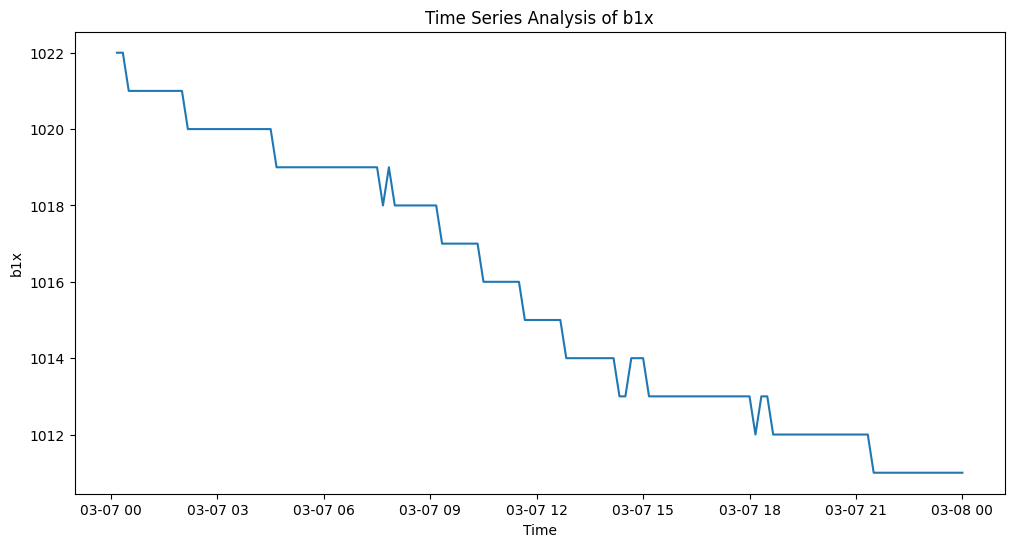

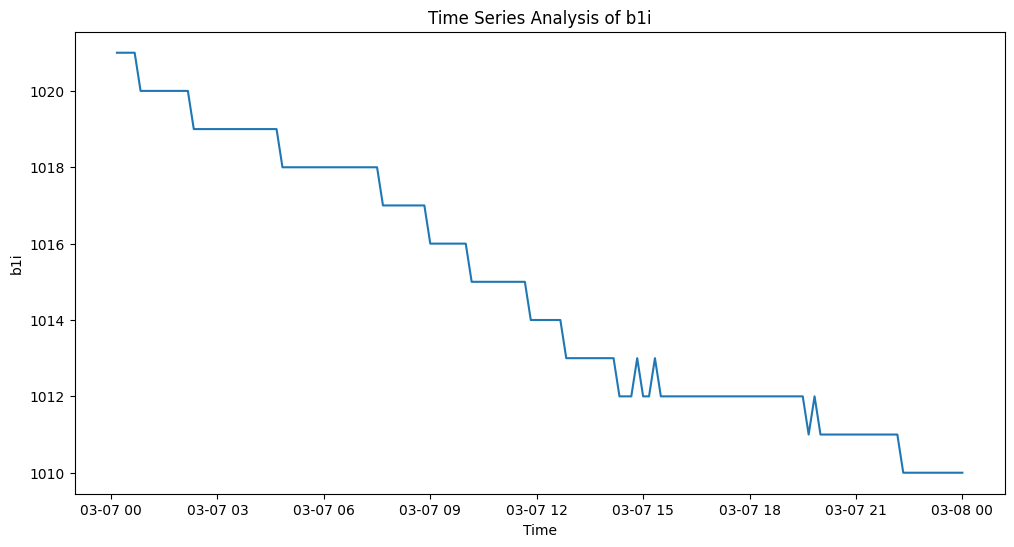

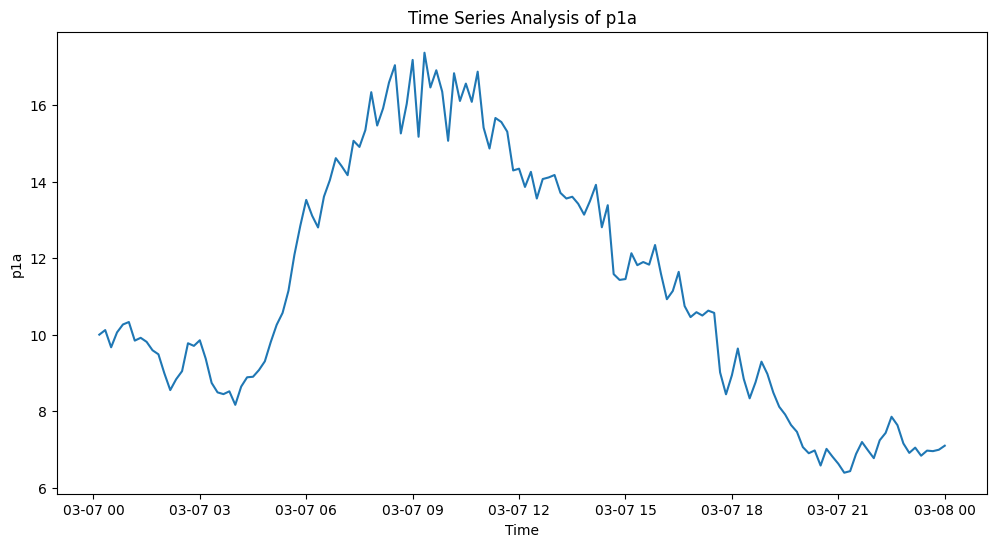

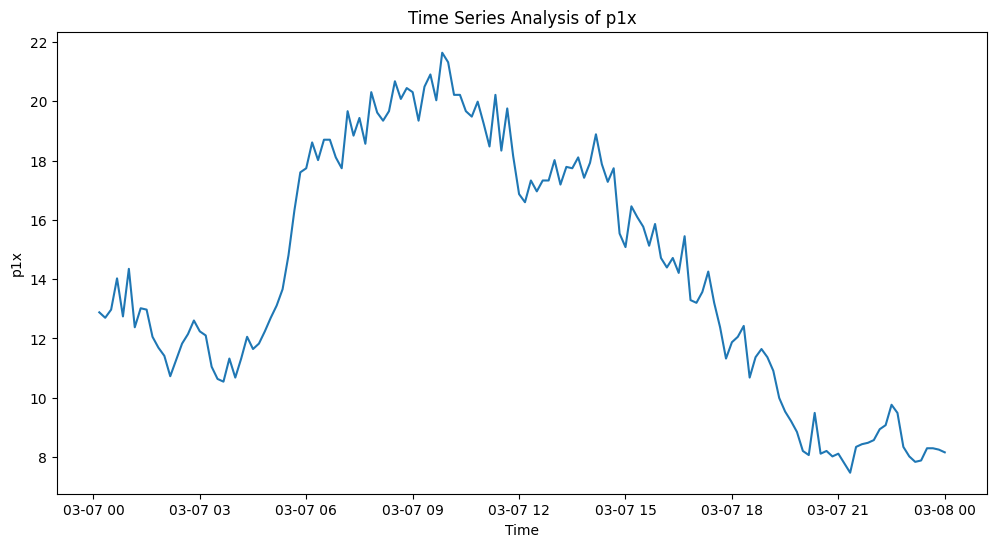

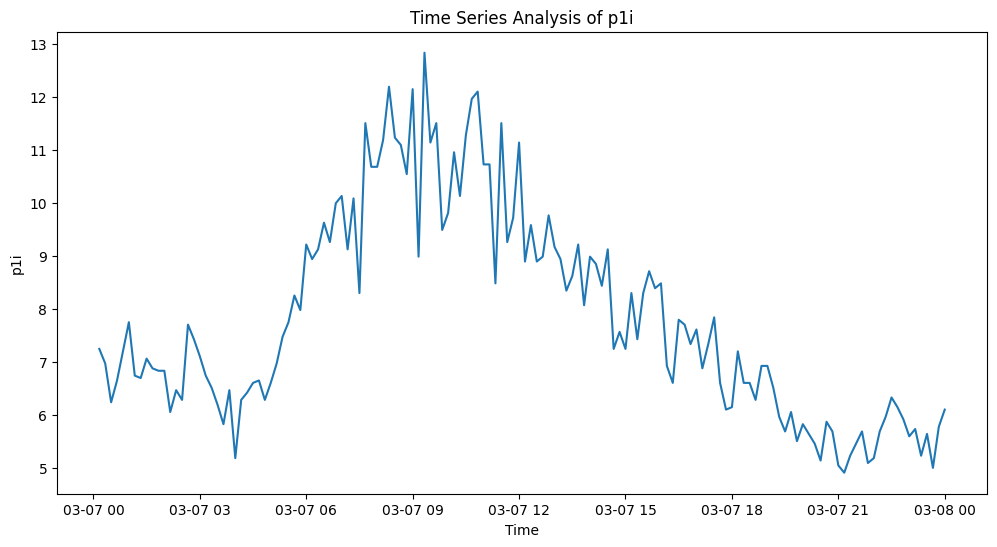

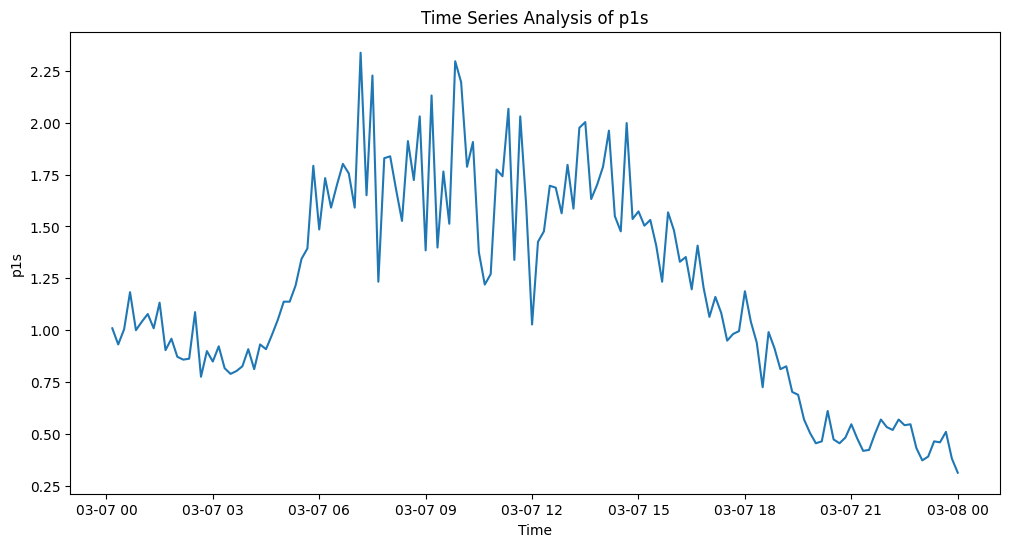

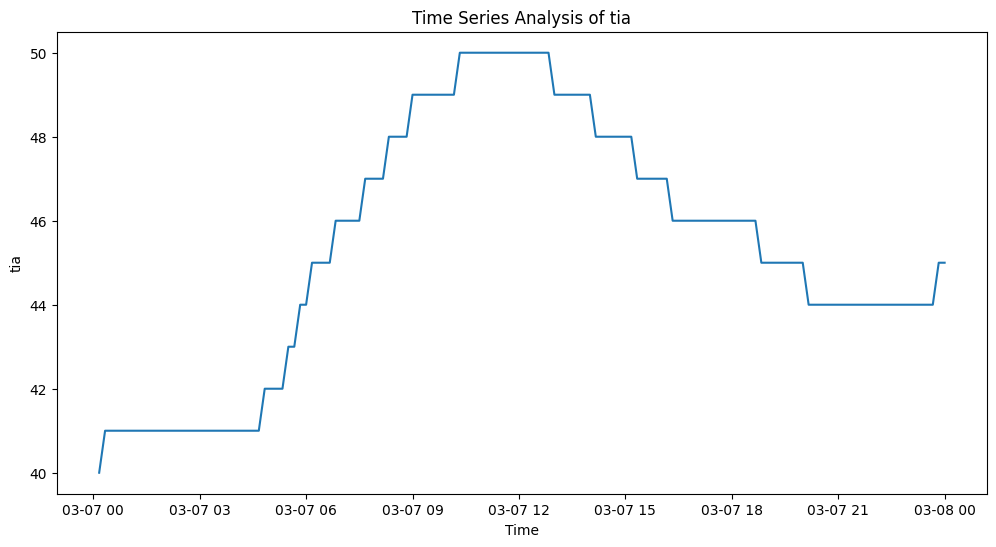

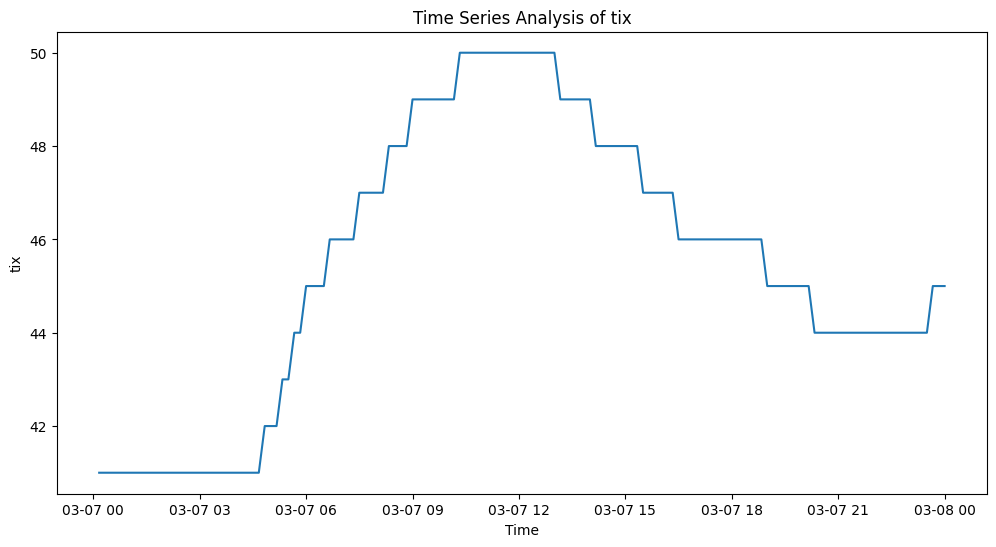

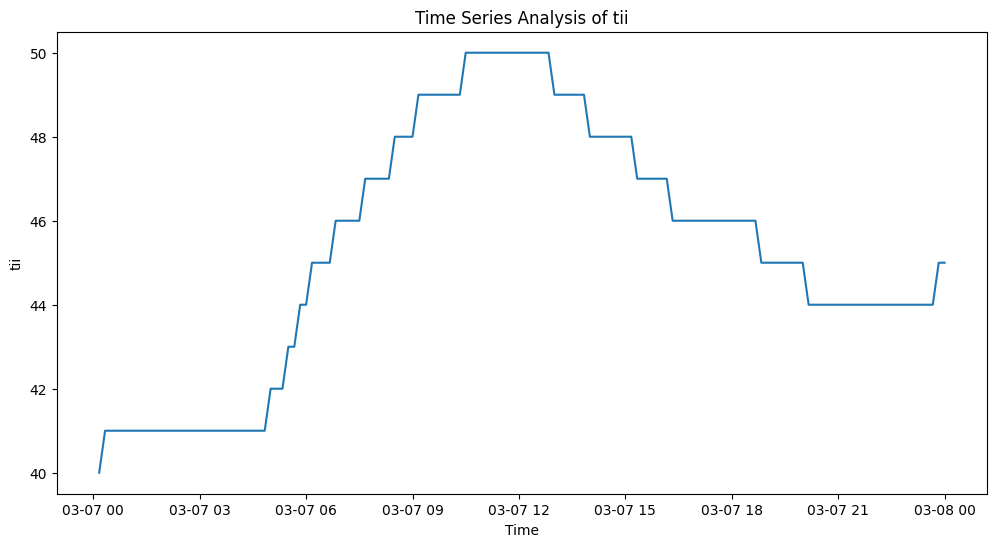

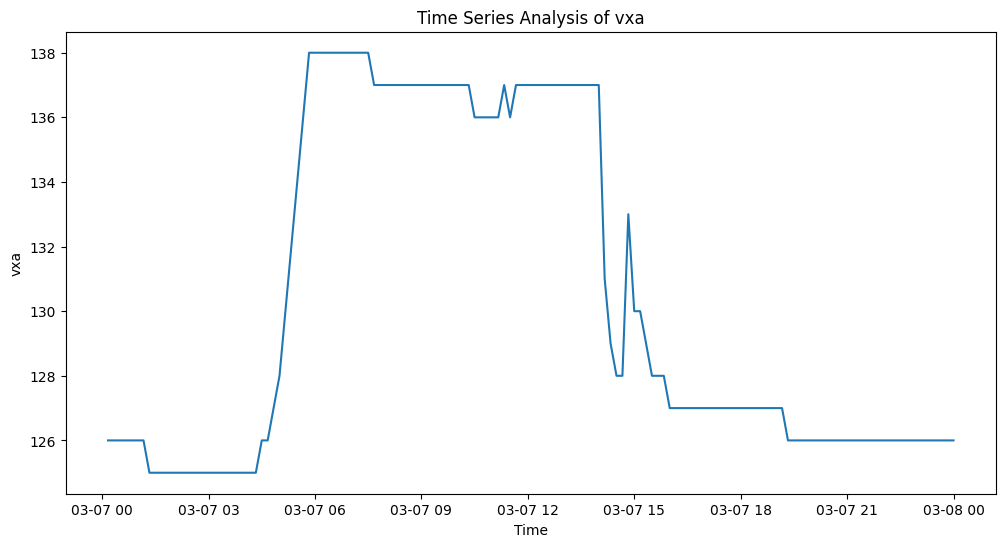

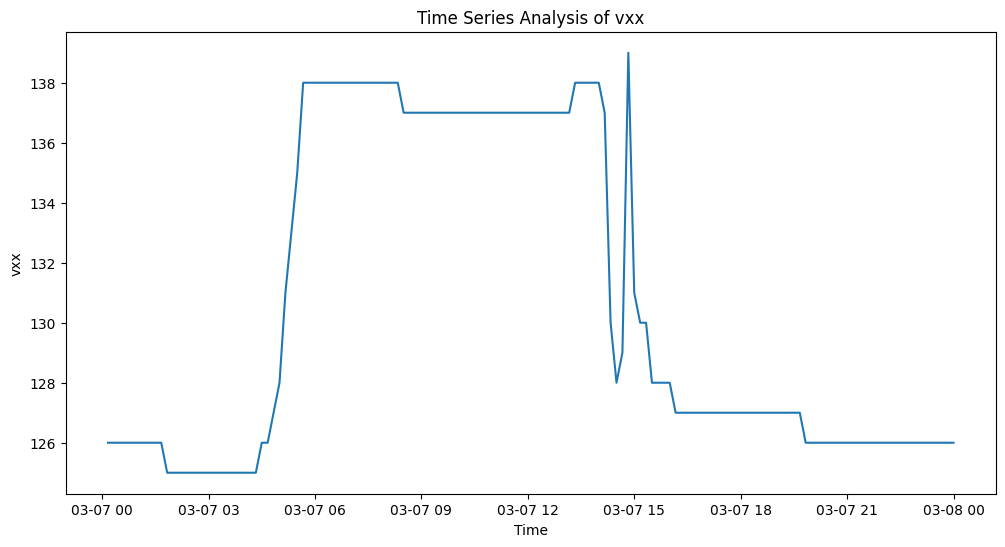

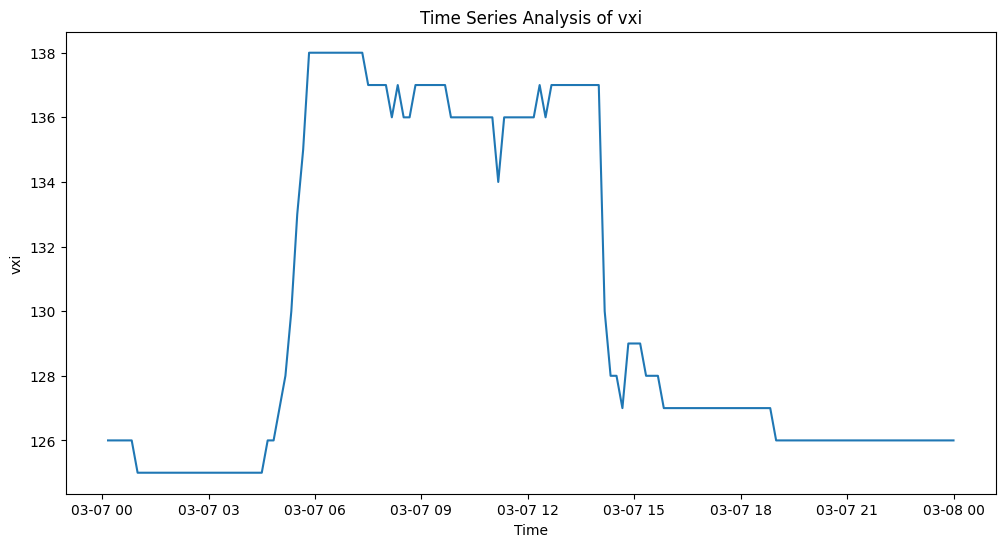

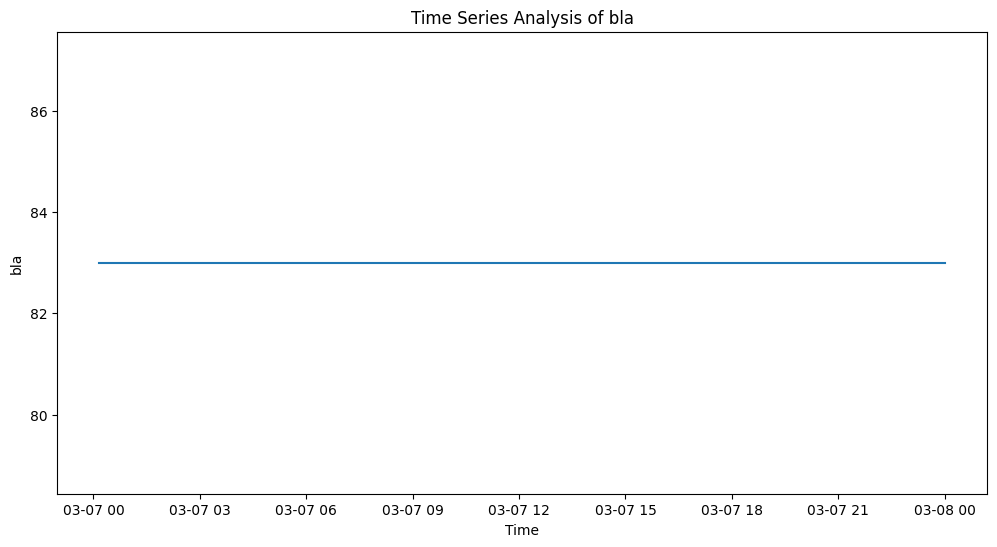

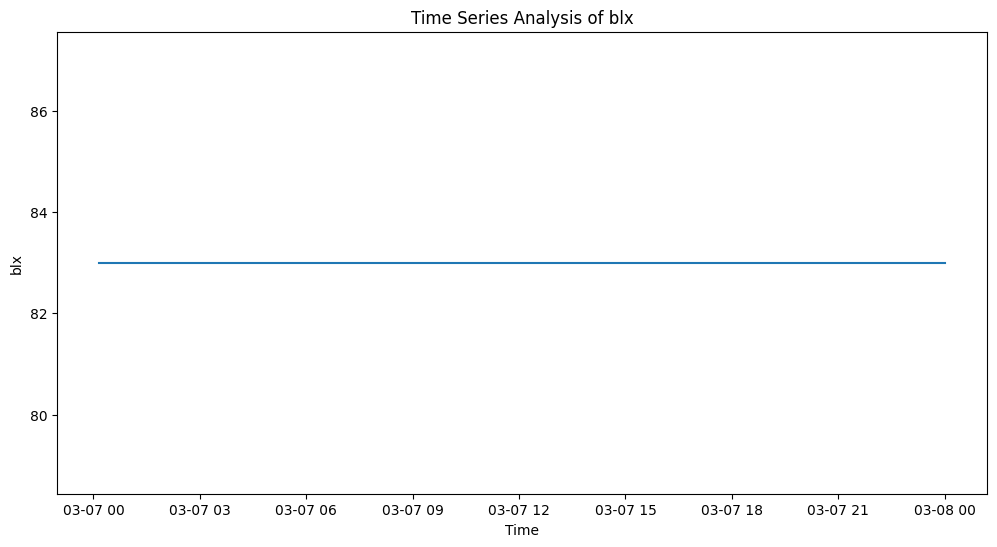

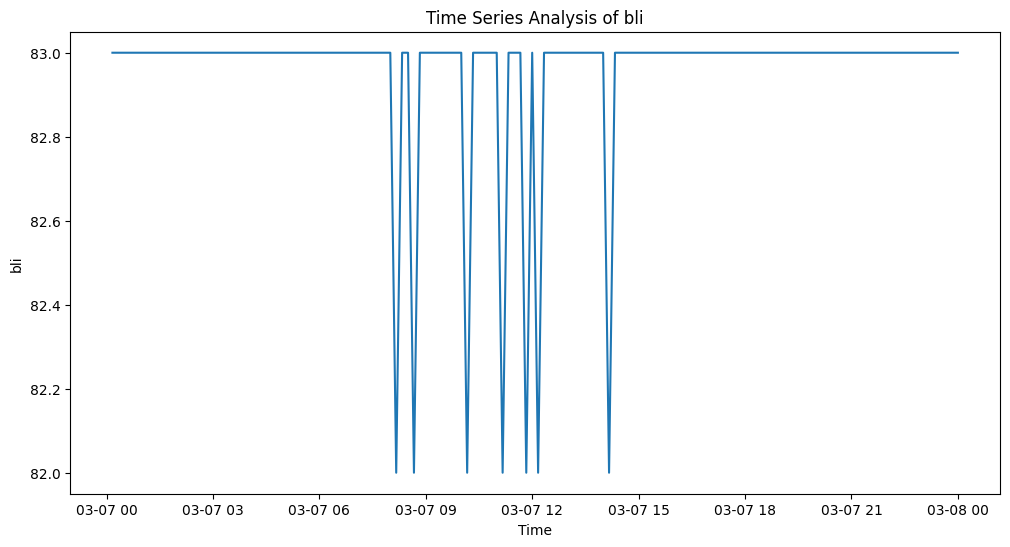

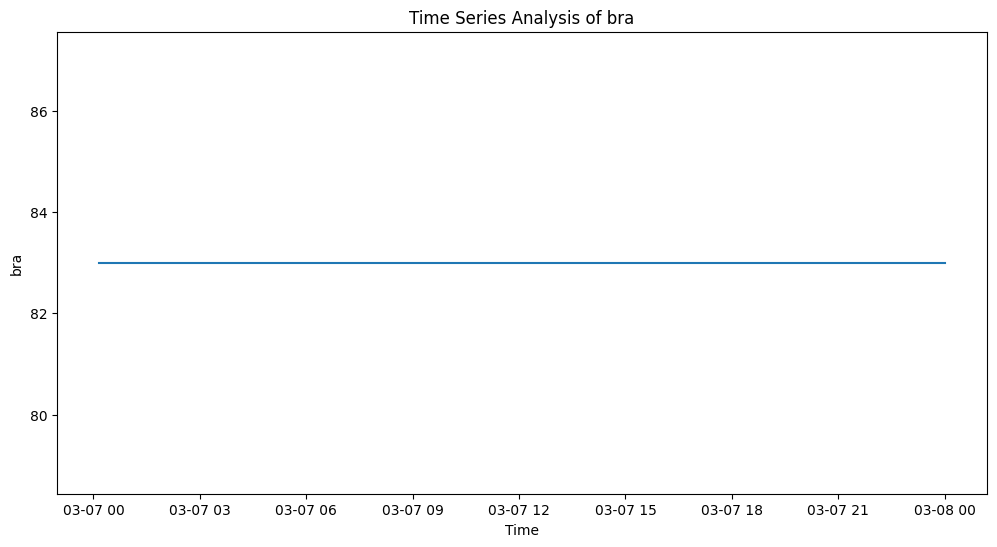

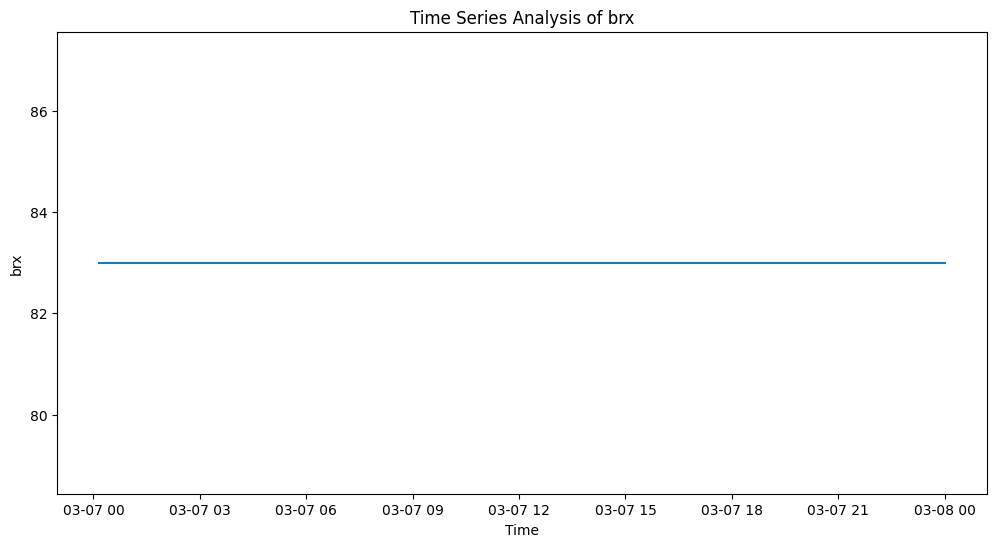

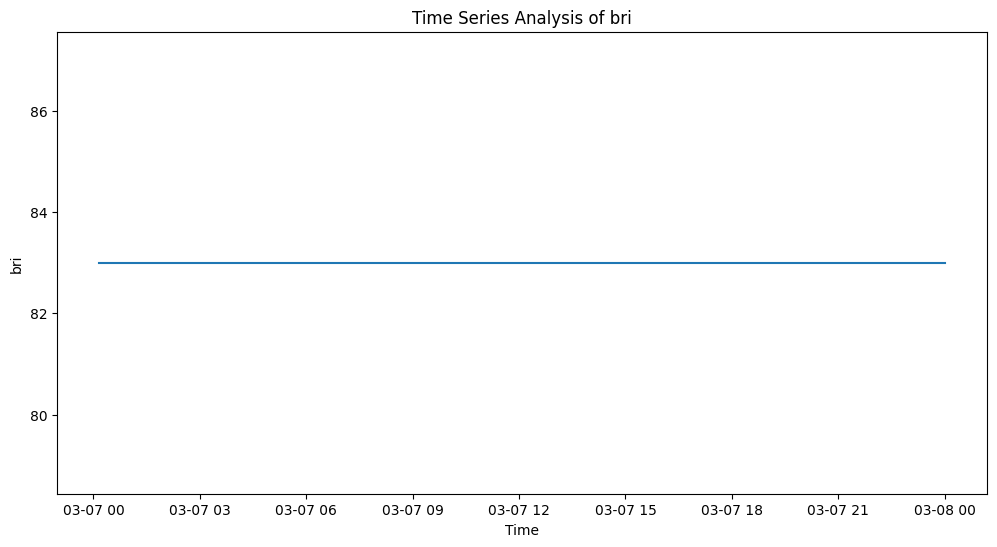

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

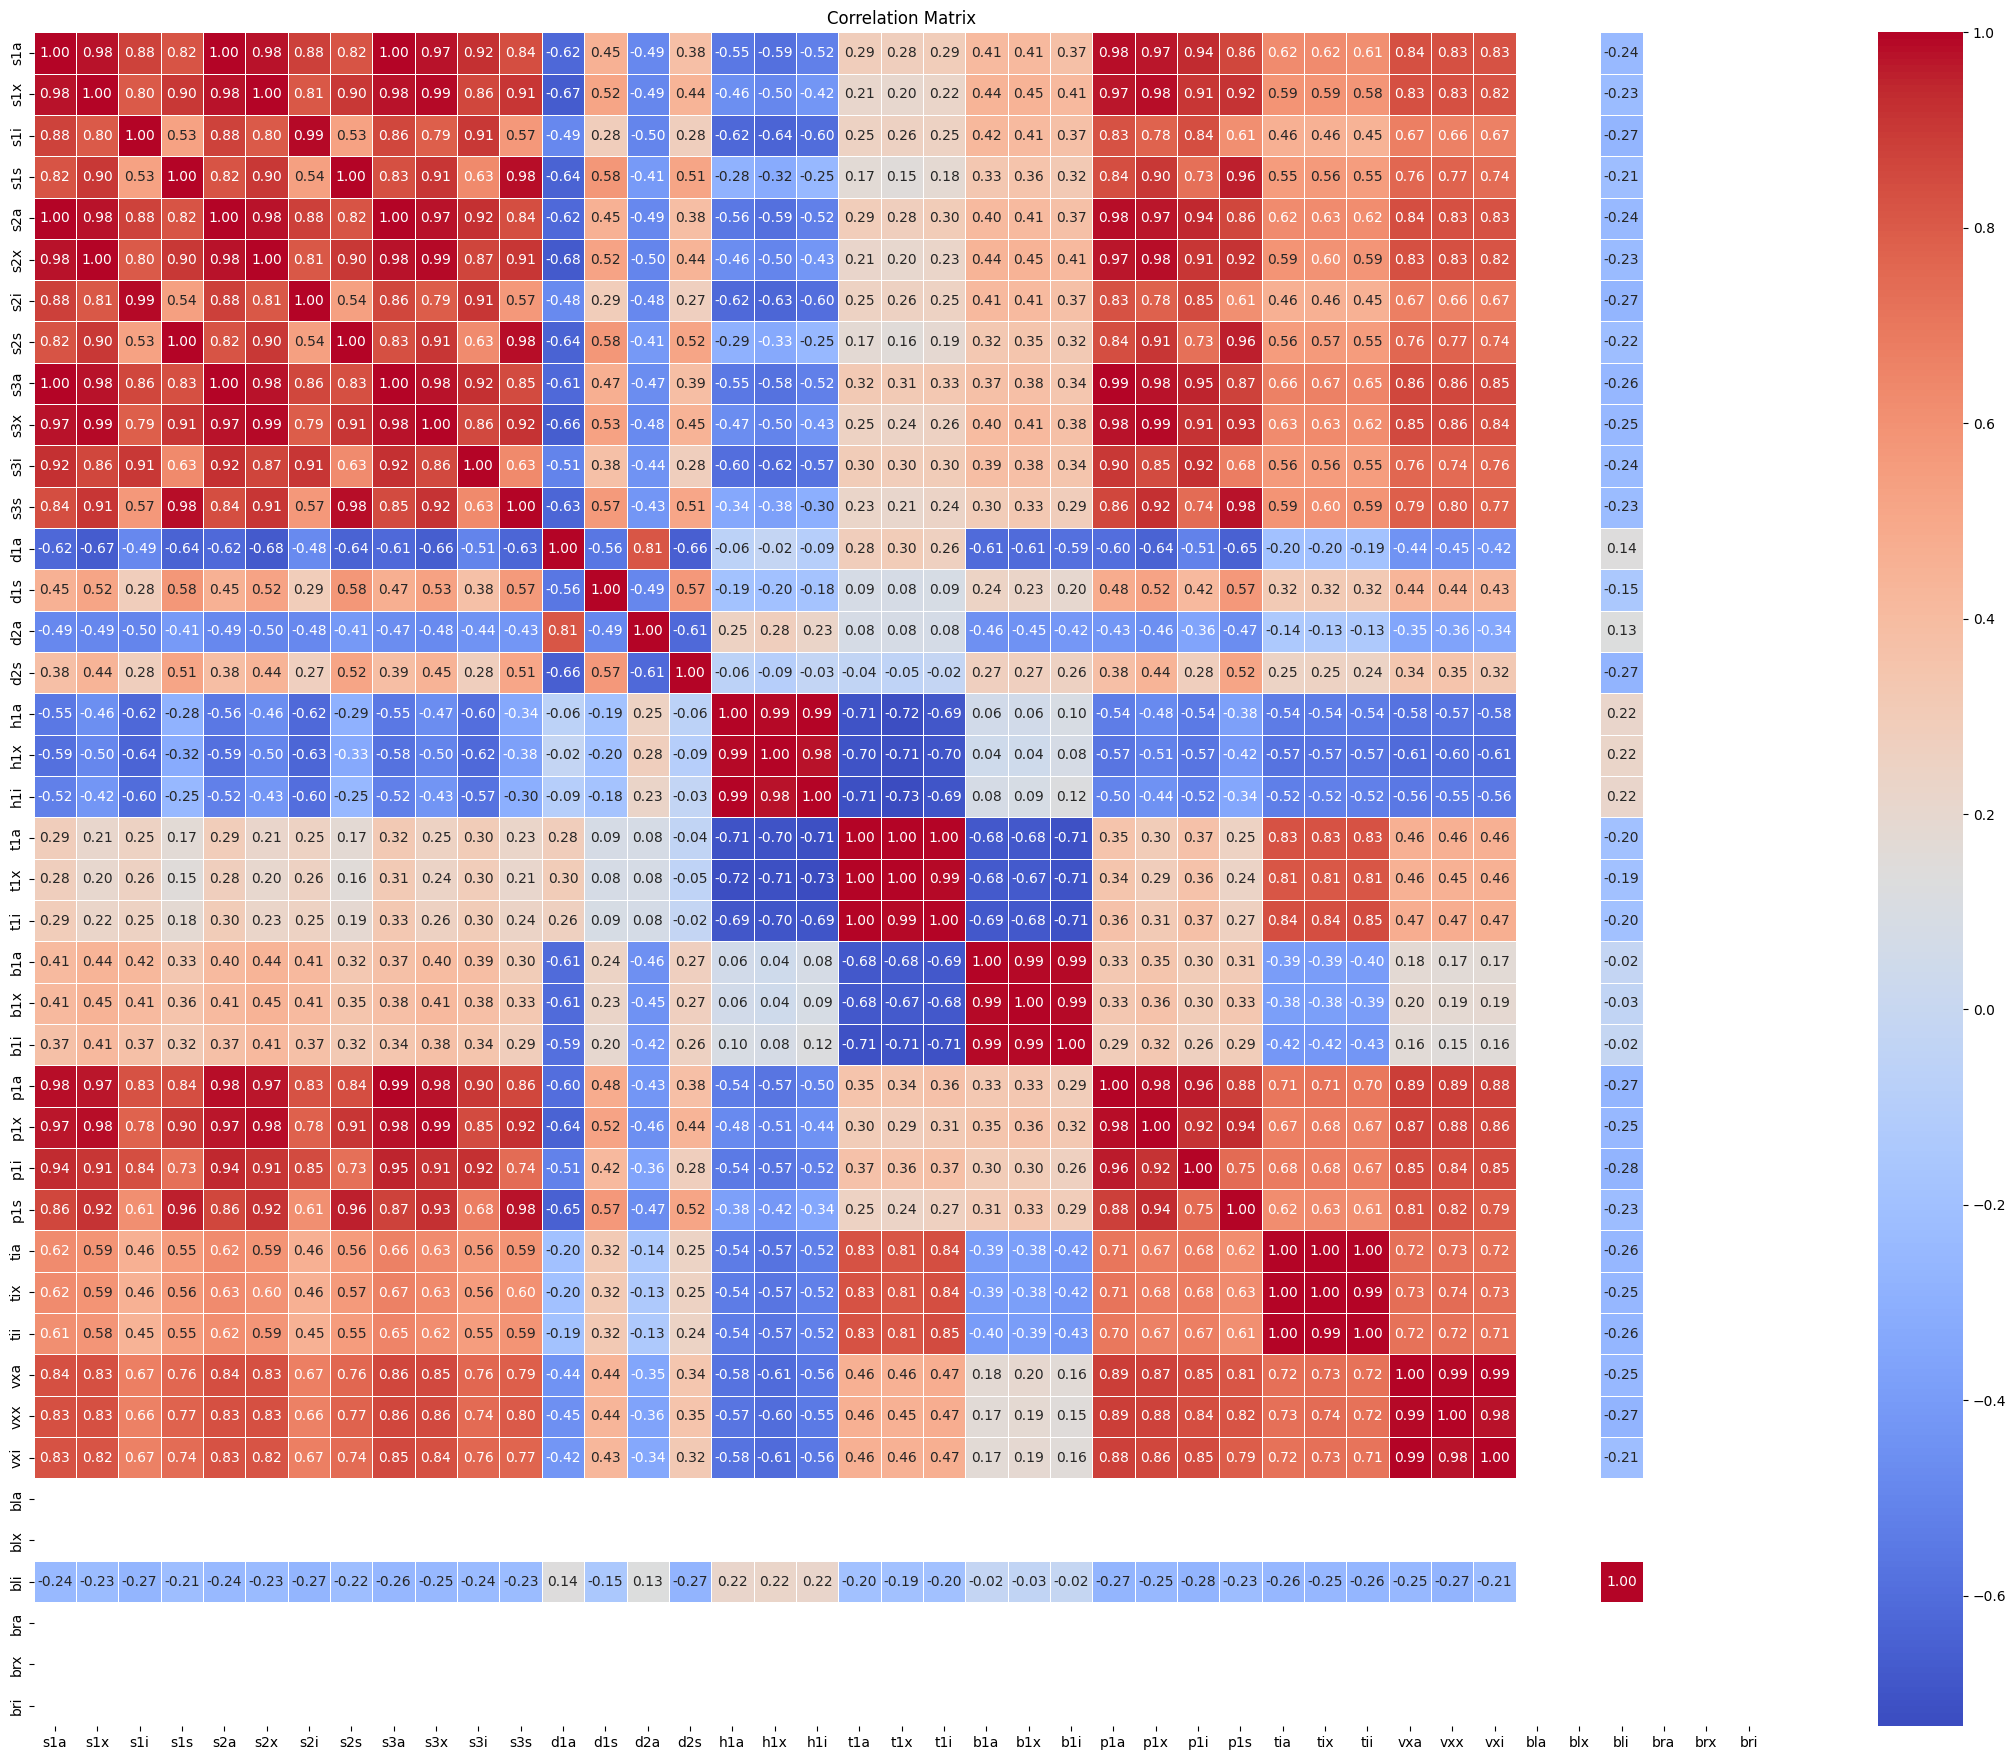

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

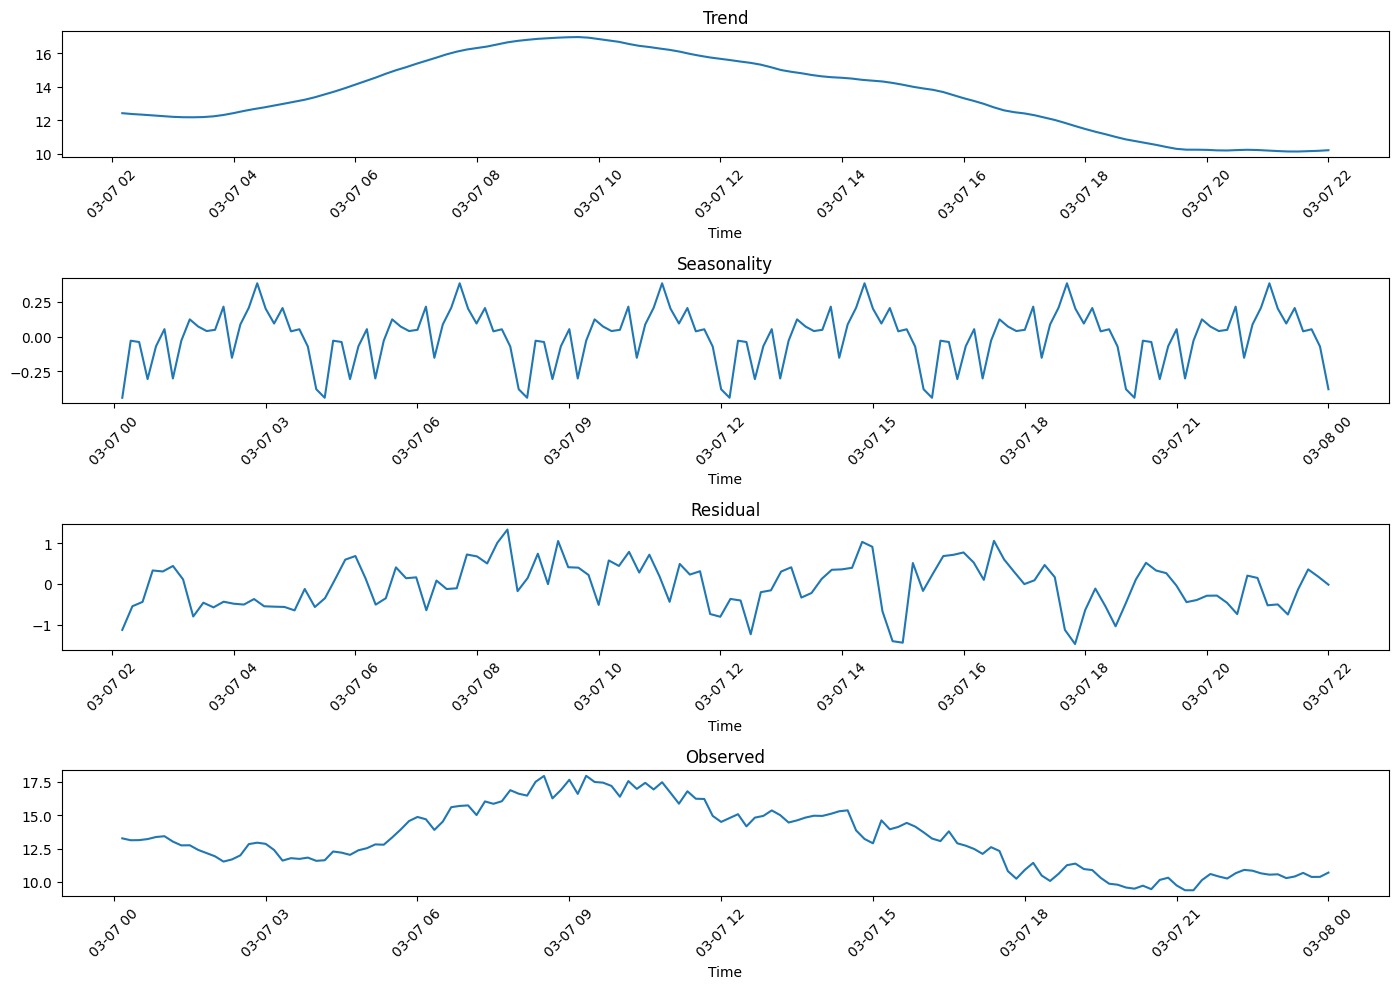

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


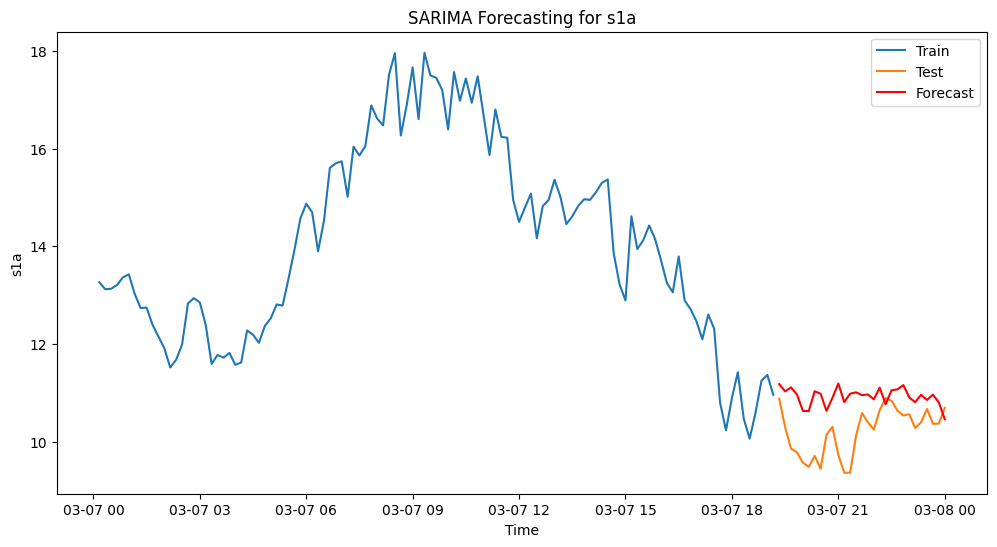

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()